|Name|Affiliation|IEEE Member|SSCS Member|
|:--:|:----------:|:----------:|:----------:|
|HyungJoo Park <br /> Email ID: pikkoro97@hanyang.ac.kr|Hanyang University, Seoul, Korea|Yes|No|
|Sungyoung Lee|Seoul National University, Seoul, Korea|Yes|No|
|Jaeduk Han|Hanyang University, Seoul, Korea|Yes|Yes|

## **Process portable Full-Custom Cell based Memory Compiler using laygo2**
A custom scan chain layout generator using laygo2

SPDX-License-Identifier: Apache-2.0

Draw a 10 bit Shift Register with subcells for the SKY130 technology using [laygo2](https://laygo2.github.io) with LVS and Post Simulation

**Object: draw a 1kbit Register File for the SKY130 technology using laygo2, and run LVS and simulation.**

In this Notebook, we are going to demonstrate python based **analog** layout generation using laygo2. 

By following the instructions provided in this notebook, you'll be able to generate and test the custom DFFRAM cell.

### About Full Custom DFFRAM

While Memory Registers such as cache are generated using memory compilers([1](https://github.com/AUCOHL/DFFRAM), [2](https://openram.org/)), there are demands on customized Memory Registers for various purposes including the following 1) standard cells are not available for the voltage domain and transistor types for the target circuits 2) propagation delay optimization problem on standard cells. Though the register that generated from this notebook is not optimized yet, owing to the property of Laygo2, this complier can be easily implemented on other technology such as GF180. And expected to be easily optimized by implementing proper unit mosfet.

The Full-Custom DFFRAM layout is automatically generated by laygo2, an automated layout generation framework for custom circuits, developed/maintained by Nifty Chips Laboratory at Hanyang University, Seoul, South Korea.

### Schematic and Simulation Preview

You can see the logic structure of DFFRAM at 'Overview' part in [DFFRAM](https://github.com/AUCOHL/DFFRAM).

The figures below show schematics of memory cells described at [DFFRAM](https://github.com/AUCOHL/DFFRAM).

![byte_cell_schematic](https://drive.google.com/uc?id=14kNLOvPYD5qS-GWJV229JCBvqLyYolJT)
Figure1. Byte cell schematic

![Word_cell_schematic](https://drive.google.com/uc?id=1K809LfMpnwoYm9Vc0i7tEeddO6MJY1Fp)
Figure2. 32-bit WORD cell schematic

![RAM_cell_schematic](https://drive.google.com/uc?id=1IcQtDo6sEWAmjBT5tS9pwkci0Bsr5QvG)
Figure3. 1k-bit RAM cell schematic

SEL bits activate WORD cell and WE bits select bytes in each WORD cells by enabling CLK-gate array. The Byte cells are activated by its CLK-gate.

Since SEL signal actuvates not only CLK-gate but also tri-state buffers for data output, 36 finger buffers are implemented for each WORD cell to deal with large fanout.

Transmission gates are used for additional CLK-gate to reduce fanout of CLK input of 32 WORD cells. Simulation shows that voltage loss of Tr-gate is sufficiently small.

This figure shows CLK buffer chain simulation result for fanout of clk input of 32 word cells. You can see the output of buffer chain flows external clk signal with sufficient delay margin for post simulation.

![SIM_CLK_buf](https://drive.google.com/uc?id=1ZCj1z31x8iapi3UlCnr_SBOAFQW6y8Wx)
Figure4. Clock buffer delay

This figure shows a schematic level simulation of Write operation using a 100MHz clock signal. 'CLK_WORD' represent output of CLK-gate controled by SEL&WE signal. You can see the output 'Do' signal follows at rising edge of CLK_WORD.

![SIM_write](https://drive.google.com/uc?id=10b47OwT3opXjtdBP6Cxi4OPoC0AjkVTW)
Figure5. RAM write operation

### Generation Flow

The custom shift registers are generated by below discribed process to translate Python code into GDS and spice files.

1. Compile Python scripts with laygo2 to generate TCL files for magic.
2. Read the TCL files with magic to generate layout.
3. Extract GDS and SPICE with magic.
4. Run LVS check with netgen and simulation with ngspice

### Install conda and dependencies

In [1]:
import os

CONDA_PREFIX = os.environ.get('CONDA_PREFIX', None)
if not CONDA_PREFIX:
  !python -m pip install condacolab
  import condacolab
  condacolab.install()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:15
🔁 Restarting kernel...


In [1]:
%%writefile environment.yml
channels:
  - litex-hub
  - conda-forge
dependencies:
  - open_pdks.sky130a
  - magic
  - gdstk
  - ngspice
  - iverilog
  - pip
  - pip:
    - gdspy
    - pyspice
    - pyyaml
    - cairosvg
    - pyverilog

Writing environment.yml


In [2]:
!mamba env update -n base -f environment.yml

[+] 0.0s
litex-hub/linux-64    ⣾  
litex-hub/noarch      ⣾  
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.1s
litex-hub/linux-64    ⣾  
litex-hub/noarch      ⣾  
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.2s
litex-hub/linux-64    ⣾  
litex-hub/noarch      ⣾  
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.3s
litex-hub/linux-64    ⣾  
litex-hub/noarch      ⣾  
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.4s
litex-hub/linux-64    ⣾  
litex-hub/noarch      ⣾  
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.5s
litex-hub/linux-64    ⣾  
litex-hub/noarch      ⣾  
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.6s
litex-hub/linux-64    ⣾  
litex-hub/noarch      ⣾  
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.7s
litex-hub/linux-64    ⣾  
litex-hub/noarch      ⣾  
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  litex-hub/noarch                                  
[+] 0.8s
litex-hub/linux-64    ⣾  
conda-forge/linux-

In [ ]:
import os

CONDA_PREFIX = os.environ.get('CONDA_PREFIX', None)
if not CONDA_PREFIX:
  import condacolab
  CONDA_PREFIX = condacolab.PREFIX

### Install the laygo2 workspace for the sky130 technology

In [3]:
!git clone https://github.com/RTimothyEdwards/netgen.git
%cd netgen
!./configure 
!make 
!make install
%cd ../
!git clone https://github.com/niftylab/laygo2_workspace_sky130.git
%cd laygo2_workspace_sky130
!git submodule init
!git submodule update --remote


Cloning into 'netgen'...
remote: Enumerating objects: 3014, done.
remote: Counting objects: 100% (549/549), done.
remote: Compressing objects: 100% (218/218), done.
remote: Total 3014 (delta 374), reused 442 (delta 300), pack-reused 2465
Receiving objects: 100% (3014/3014), 2.71 MiB | 13.35 MiB/s, done.
Resolving deltas: 100% (1700/1700), done.
/content/netgen
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking target system type... x86_64-unknown-linux-gnu
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking how to run the C preprocessor... gcc -E
checking for libra

### RAM32 Write Operation Simulation

Simulate write operation and WORD changing operation with 100mhz CLK.

note: It would takes long time.

### Import packages, set parameters, and load templates/grids

In [ ]:
%cd /content/laygo2_workspace_sky130

/content/laygo2_workspace_sky130


In [4]:
import sys
sys.path.append("/content/laygo2_workspace_sky130/laygo2")
print(sys.path)

['/usr/local/lib/python3.9/site-packages', '/content', '/env/python', '/usr/lib/python39.zip', '/usr/lib/python3.9', '/usr/lib/python3.9/lib-dynload', '', '/usr/local/lib/python3.9/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.9/dist-packages/IPython/extensions', '/root/.ipython', '/content/laygo2_workspace_sky130/laygo2']


In [5]:
import numpy as np
import pprint
import laygo2
import laygo2.interface
import laygo2_tech as tech
tpmos_name = 'pmos_sky'
tnmos_name = 'nmos_sky'
tptap_name = 'ptap_sky'
tntap_name = 'ntap_sky'
templates = tech.load_templates()
tpmos, tnmos = templates[tpmos_name], templates[tnmos_name]

pg_name = 'placement_basic'
r12_name = 'routing_12_cmos'
r23_name = 'routing_23_cmos'
grids = tech.load_grids(templates=templates)
pg, r12, r23 = grids[pg_name], grids[r12_name], grids[r23_name]

### Generate primary logic subcells
Inverter

Tri-state Inverter

Buffer

Nand

3-input Nand

Nor

Transmission Gate

2-phase Clock Latch

D Flip-Flop

TAP

Mux-2to1

In [6]:
exec(open("laygo2_example/logic/inv.py").read())
exec(open("laygo2_example/logic/tinv.py").read())
exec(open("laygo2_example/logic/tinv_small_1x.py").read())
exec(open("laygo2_example/logic/space.py").read())
exec(open("laygo2_example/logic/buffer.py").read())
exec(open("laygo2_example/logic/nand.py").read())
exec(open("laygo2_example/logic/nand3.py").read())
exec(open("laygo2_example/logic/nor.py").read())
exec(open("laygo2_example/logic/tgate.py").read())
exec(open("laygo2_example/logic/latch_2ck.py").read())
exec(open("laygo2_example/logic/dff.py").read())
exec(open("laygo2_example/logic/tap.py").read())
exec(open("laygo2_example/logic/mux2to1.py").read())

Load templates
<laygo2.object.template.core.UserDefinedTemplate object at 0x7f77a426d850> name: pmos_sky, class: UserDefinedTemplate, 
<laygo2.object.template.core.UserDefinedTemplate object at 0x7f77a426dca0> name: nmos_sky, class: UserDefinedTemplate, 
Load grids
 name: placement_basic, 
 class: PlacementGrid, 
 scope: [[0, 0], [72, 24]], 
 elements: [array([0]), array([0])], 

 name: routing_12_cmos, 
 class: RoutingGrid, 
 scope: [[0, 0], [72, 1008]], 
 elements: [array([0]), array([  0, 144, 216, 360, 504, 648, 792, 864])], 
 vwidth: <laygo2.object.grid.core.CircularMapping object at 0x7f77a60a3910> class: CircularMapping, elements: [30]
 hwidth: <laygo2.object.grid.core.CircularMapping object at 0x7f77a60a3fd0> class: CircularMapping, elements: [60 30 30 30 30 30 30 30]
 vextension: <laygo2.object.grid.core.CircularMapping object at 0x7f77a60a3400> class: CircularMapping, elements: [10]
 hextension: <laygo2.object.grid.core.CircularMapping object at 0x7f77a60a3940> class: Circula

<string>:86: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
<string>:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#dep

Load templates
Load grids
--------------------
Now Creating space_1x
Create instances
Create wires
Export design

--------------------
Now Creating space_2x
Create instances
Create wires
Export design

--------------------
Now Creating space_4x
Create instances
Create wires
Export design

--------------------
Now Creating space_8x
Create instances
Create wires
Export design

--------------------
Now Creating space_14x
Create instances
Create wires
Export design

Load templates
Load grids
--------------------
Now Creating buffer_2x
Create instances
Create wires
Export design
--------------------
Now Creating buffer_4x
Create instances
Create wires
Export design
--------------------
Now Creating buffer_8x
Create instances
Create wires
Export design
--------------------
Now Creating buffer_12x
Create instances
Create wires
Export design
--------------------
Now Creating buffer_14x
Create instances
Create wires
Export design
--------------------
Now Creating buffer_16x
Create instances
Cre

### Generate Advanced logic subcells
4-input And

Integrated Clock Gate (ICG)

Decoder-2x4

Decoder-3x8


In [7]:
exec(open("laygo2_example/logic_advance/and4.py").read())
exec(open("laygo2_example/logic_advance/clk_gate.py").read())
exec(open("laygo2_example/logic_advance/dec2x4.py").read())
exec(open("laygo2_example/logic_advance/dec3x8.py").read())

Load templates
Load grids
--------------------
Now Creating and4_2x
Create instances
Create wires
Export design
Load templates
Load grids
--------------------
Now Creating cgate_2x
Create instances
Create wires
Export design
Load templates
Load grids
--------------------
Now Creating dec2x4_2x
Create instances
Create wires
Export design
Load templates
Load grids
--------------------
Now Creating dec3x8_2x
Create instances
Create wires
Export design


### Generate a DFF-based Byte register Cell

In [8]:
# Variables
cell_type = 'ram32_v2'
nf=2
words_num = 32 # must be an even number
buffer_num = 8+4+1 # number of buffers
# Templates
tpmos_name = 'pmos_sky'
tnmos_name = 'nmos_sky'
tptap_name = 'ptap_sky'
tntap_name = 'ntap_sky'
# Grids
pg_name = 'placement_basic'
r12_name = 'routing_12_cmos'
r23_basic_name = 'routing_23_basic'
r23_cmos_name = 'routing_23_cmos'
r34_name = 'routing_34_basic'
# Design hierarchy
libname = 'logic_advanced'
ref_dir_template = './laygo2_example/' #export this layout's information into the yaml in this dir 
ref_dir_export = './laygo2_example/logic_advance/'
ref_dir_MAG_exported = './laygo2_example/logic_advance/TCL/'
ref_dir_layout = './magic_layout'
# End of parameter definitions ######

# Generation start ##################
# 1. Load templates and grids.
print("Load templates")
templates = tech.load_templates()
tpmos, tnmos = templates[tpmos_name], templates[tnmos_name]
tlogic_prim = laygo2.interface.yaml.import_template(filename=ref_dir_template+'logic/logic_generated_templates.yaml')
tlogic_adv = laygo2.interface.yaml.import_template(filename=ref_dir_template+'logic_advance/logic_advanced_templates.yaml')

print("Load grids")
grids = tech.load_grids(templates=templates)
pg, r12, r23_cmos, r23, r34 = grids[pg_name], grids[r12_name], grids[r23_cmos_name], grids[r23_basic_name], grids[r34_name]

# Variables
cell_type = 'byte_dff'
nf=2
# Generation start ##################

cellname = cell_type+'_'+str(nf)+'x'
print('--------------------')
print('Now Creating '+cellname)

# 2. Create a design hierarchy
lib = laygo2.object.database.Library(name=libname)
dsn = laygo2.object.database.Design(name=cellname, libname=libname)
lib.append(dsn)

# 3. Create istances.
print("Create instances")
inv_sel = tlogic_prim['inv_'+str(nf)+'x'].generate(name='inv_sel')
inv_and = tlogic_prim['inv_'+str(nf)+'x'].generate(name='inv_and')
nand = tlogic_prim['nand_'+str(nf)+'x'].generate(name='nand')
cgate = tlogic_adv['cgate_'+str(nf)+'x'].generate(name='cgate0')
cells=list()
for i in range(8):
    cells.append(tlogic_prim['dff_'+str(nf)+'x'].generate(name='dff_'+str(i)))
    cells.append(tlogic_prim['inv_'+str(nf)+'x'].generate(name='inv'+str(i)))
    cells.append(tlogic_prim['tinv_'+str(nf)+'x'].generate(name='tinv'+str(i)))

# 4. Place instances.
dsn.place(grid=pg, inst=nand, mn=[0,0])
dsn.place(grid=pg, inst=inv_and, mn=pg.mn.bottom_right(nand))
dsn.place(grid=pg, inst=inv_sel, mn=pg.mn.bottom_right(inv_and))
dsn.place(grid=pg, inst=cgate, mn=pg.mn.bottom_right(inv_sel))
dsn.place(grid=pg, inst=cells, mn=pg.mn.bottom_right(cgate))

# 5. Create and place wires.
print("Create wires")
# sel
mn_list = [r34.mn(nand.pins['B'])[0], r34.mn(inv_sel.pins['I'])[0]]
for i in range(8):
    mn_list.append(r34.mn(cells[3*i+2].pins['EN'])[0]) # ~= cells[i].tinv.pins[EN]
_track = [None, r34.mn(inv_sel.pins['O'])[0,1]-1]
rsel = dsn.route_via_track(grid=r34, mn=mn_list, track=_track)

# sel_bar
mn_list = [r34.mn(inv_sel.pins['O'])[0]]
for i in range(8):
    mn_list.append(r34.mn(cells[3*i+2].pins['ENB'])[0]) # ~= cells[i].tinv.pins[ENB]
_track = [None, r34.mn(inv_sel.pins['O'])[0,1]+1]
dsn.route_via_track(grid=r34, mn=mn_list, track=_track)

# Nand_inv
mn_list = [ r23.mn(nand.pins['OUT'])[0], r23.mn(inv_and.pins['I'])[0] ]
_track = [None, (r23.mn(inv_and.pins['I'])[0,1]+r23.mn(inv_and.pins['I'])[1,1])/2]
dsn.route_via_track(grid=r23, mn=mn_list, track=_track)

# clock en
mn_list = [r23.mn(inv_and.pins['O'])[0], r23.mn(cgate.pins['EN'])[0] ]
_track = [None,(r23.mn(cgate.pins['EN'])[0,1]+r23.mn(cgate.pins['EN'])[1,1])/2]
dsn.route_via_track(grid=r23, mn=mn_list, track=_track)

# clk flip flop
mn_list = [r34.mn(cgate.pins['CK_O'])[0]]
for i in range(8):
    mn_list.append(r34.mn(cells[3*i].pins['CLK'])[0])
_track = [None, r34.mn(cgate.pins['CK_O'])[0,1]]
dsn.route_via_track(grid=r34, mn=mn_list, track=_track)

# cell internal
for i in range(8):
    # dff_out <--> inv_in
    mn_list = [r23.mn(cells[3*i].pins['O'])[0], r23.mn(cells[3*i+1].pins['I'])[0]]
    _track = [None, (r23.mn(cells[3*i+1].pins['I'])[0,1] + r23.mn(cells[3*i+1].pins['I'])[1,1])/2]
    dsn.route_via_track(grid=r23, mn=mn_list, track=_track)
    # inv_out <--> tinv_in
    mn_list = [r23.mn(cells[3*i+1].pins['O'])[0], r23.mn(cells[3*i+2].pins['I'])[0]]
    _track = [None, (r23.mn(cells[3*i+2].pins['I'])[0,1] + r23.mn(cells[3*i+2].pins['I'])[1,1])/2]
    dsn.route_via_track(grid=r23, mn=mn_list, track=_track)

# VSS
rvss0 = dsn.route(grid=r12, mn=[r12.mn.bottom_left(nand), r12.mn.bottom_right(cells[3*8-1])])

# VDD
rvdd0 = dsn.route(grid=r12, mn=[r12.mn.top_left(nand), r12.mn.top_right(cells[3*8-1])])

# 6. Create pins.
psel =  dsn.pin(name='SEL', grid=r34, mn=r34.mn.bbox(rsel[-1]))
pwe = dsn.pin(name='WE', grid=r23_cmos, mn=r23_cmos.mn.bbox(nand.pins['A']))
pclk = dsn.pin(name='CLK', grid=r23_cmos, mn=r23_cmos.mn.bbox(cgate.pins['CK_I']))
pDo = list()
pDi = list()
for i in range(8):
    pDo.append(dsn.pin(name='Do<'+str(7-i)+'>', grid=r23_cmos, mn=r23_cmos.mn.bbox(cells[3*(7-i)+2].pins['O'])))
    pDi.append(dsn.pin(name='Di<'+str(7-i)+'>', grid=r23_cmos, mn=r23_cmos.mn.bbox(cells[3*(7-i)].pins['I'])))
# pA2bar = dsn.pin(name='A2bar', grid=r23_cmos, mn=r23_cmos.mn.bbox(inv0.pins['O']))

pvss0 = dsn.pin(name='VSS', grid=r12, mn=r12.mn.bbox(rvss0))
pvdd0 = dsn.pin(name='VDD', grid=r12, mn=r12.mn.bbox(rvdd0))

# 7. Export to physical database.
print("Export design")

# Uncomment for BAG export
laygo2.interface.magic.export(lib, filename=ref_dir_MAG_exported +libname+'_'+cellname+'.tcl', cellname=None, libpath=ref_dir_layout, scale=1, reset_library=False, tech_library='sky130A')

# 8. Export to a template database file.
nat_temp = dsn.export_to_template()
laygo2.interface.yaml.export_template(nat_temp, filename=ref_dir_export+libname+'_templates.yaml', mode='append')

Load templates
Load grids
--------------------
Now Creating byte_dff_2x
Create instances
Create wires
Export design


{'logic_advanced': {'and4_2x': {'bbox': [[0, 0], [1728, 1008]],
   'cellname': 'and4_2x',
   'libname': 'logic_advanced',
   'pins': {'A': {'layer': ['M3', 'pin'],
     'name': 'A',
     'netname': 'A',
     'xy': [[921, 360], [951, 648]]},
    'B': {'layer': ['M3', 'pin'],
     'name': 'B',
     'netname': 'B',
     'xy': [[705, 360], [735, 648]]},
    'C': {'layer': ['M3', 'pin'],
     'name': 'C',
     'netname': 'C',
     'xy': [[345, 360], [375, 648]]},
    'D': {'layer': ['M3', 'pin'],
     'name': 'D',
     'netname': 'D',
     'xy': [[129, 360], [159, 648]]},
    'VDD': {'layer': ['M2', 'pin'],
     'name': 'VDD',
     'netname': 'VDD',
     'xy': [[0, 978], [1728, 1038]]},
    'VSS': {'layer': ['M2', 'pin'],
     'name': 'VSS',
     'netname': 'VSS',
     'xy': [[0, -30], [1728, 30]]},
    'Y': {'layer': ['M3', 'pin'],
     'name': 'Y',
     'netname': 'Y',
     'xy': [[1569, 216], [1599, 864]]}}},
  'cgate_2x': {'bbox': [[0, 0], [3456, 1008]],
   'cellname': 'cgate_2x',
   'l

### Generate 32-bit Word

In [9]:
# Parameter definitions #############
# Variables
cell_type = 'word_2row'
nf=2
# Templates
tpmos_name = 'pmos_sky'
tnmos_name = 'nmos_sky'
tptap_name = 'ptap_sky'
tntap_name = 'ntap_sky'
# Grids
pg_name = 'placement_basic'
r12_name = 'routing_12_cmos'
r23_basic_name = 'routing_23_basic'
r23_cmos_name = 'routing_23_cmos'
r34_name = 'routing_34_basic'
# Design hierarchy
libname = 'logic_advanced'
ref_dir_template = './laygo2_example/' #export this layout's information into the yaml in this dir 
ref_dir_export = './laygo2_example/logic_advance/'
ref_dir_MAG_exported = './laygo2_example/logic_advance/TCL/'
ref_dir_layout = './magic_layout'
# End of parameter definitions ######

# Generation start ##################
# 1. Load templates and grids.
print("Load templates")
templates = tech.load_templates()
tpmos, tnmos = templates[tpmos_name], templates[tnmos_name]
tlogic_prim = laygo2.interface.yaml.import_template(filename=ref_dir_template+'logic/logic_generated_templates.yaml')
tlogic_adv = laygo2.interface.yaml.import_template(filename=ref_dir_template+'logic_advance/logic_advanced_templates.yaml')

print("Load grids")
grids = tech.load_grids(templates=templates)
pg, r12, r23_cmos, r23, r34 = grids[pg_name], grids[r12_name], grids[r23_cmos_name], grids[r23_basic_name], grids[r34_name]

cellname = cell_type+'_'+str(nf)+'x'
print('--------------------')
print('Now Creating '+cellname)

# 2. Create a design hierarchy
lib = laygo2.object.database.Library(name=libname)
dsn = laygo2.object.database.Design(name=cellname, libname=libname)
lib.append(dsn)

# 3. Create istances.
print("Create instances")

cells=list()
for i in range(2):
    cells.append(tlogic_adv['byte_dff_'+str(nf)+'x'].generate(name='byte_dff'+str(i*2)))
    cells.append(tlogic_adv['byte_dff_'+str(nf)+'x'].generate(name='byte_dff'+str(i*2+1), transform='MX'))
buf_sel=[]
buf_sel.append(tlogic_prim['inv_'+str(36)+'x'].generate(name='inv_sel0', transform='MX'))
buf_sel.append(tlogic_prim['inv_'+str(36)+'x'].generate(name='inv_sel1', transform='MY'))
tgate0 = tlogic_prim['tgate_'+str(nf)+'x'].generate(name='gate_clk')
NTAP1 = templates[tntap_name].generate(name='MNT1', transform='MX', params={'nf':4, 'tie':'TAP0'})
PTAP1 = templates[tptap_name].generate(name='MPT1', params={'nf':4, 'tie':'TAP0'})

# 4. Place instances.
_TAP = [0]*2
_TAP[1] = [NTAP1]
_TAP[0] = [PTAP1]

mn_ref = [0,0]
dsn.place(grid=pg, inst=cells[0], mn=mn_ref)
mn_ref = pg.mn.top_left(cells[0]) + pg.mn.height_vec(cells[1])
dsn.place(grid=pg, inst=cells[1], mn=mn_ref)
mn_ref = pg.mn.bottom_right(cells[0]) + pg.mn.width_vec(buf_sel[1])
dsn.place(grid=pg, inst=buf_sel[1], mn=mn_ref)
mn_ref = pg.mn.top_left(buf_sel[1]) + pg.mn.height_vec(buf_sel[0])
dsn.place(grid=pg, inst=buf_sel[0], mn=mn_ref)
mn_ref = pg.mn.bottom_right(buf_sel[1])
dsn.place(grid=pg, inst=tgate0, mn=mn_ref)
mn_ref = pg.mn.top_left(tgate0)
dsn.place(grid=pg, inst=_TAP, mn=mn_ref)
mn_ref = pg.mn.bottom_right(tgate0)
dsn.place(grid=pg, inst=cells[2], mn=mn_ref)
mn_ref = pg.mn.top_left(cells[2]) + pg.mn.height_vec(cells[3])
dsn.place(grid=pg, inst=cells[3], mn=mn_ref)
# 5. Create and place wires.
print("Create wires")
## input sig == sel_bar(dec outputs are inverted) -> inv_sel out == sel
# sel
mn_list = [r23.mn(buf_sel[0].pins['O'])[0], r23.mn(buf_sel[1].pins['I'])[1]]
_track = [None, r23.mn(buf_sel[1].pins['I'])[1,1]]
dsn.route_via_track(grid=r23, mn=mn_list, track=_track)

mn_list = [r34.mn(cells[0].pins['SEL'])[1], r34.mn(buf_sel[1].pins['O'])[0], r34.mn(cells[2].pins['SEL'])[0]]
_track = [None, r34.mn(cells[0].pins['SEL'])[1,1]]
rsel = dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
mn_list = [r34.mn(cells[1].pins['SEL'])[1], r34.mn(buf_sel[1].pins['O'])[1], r34.mn(cells[3].pins['SEL'])[0]]
_track = [None, r34.mn(cells[1].pins['SEL'])[1,1]]
dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
mn_list = [r23.mn(buf_sel[1].pins['I'])[1], r23.mn(tgate0.pins['ENB'])[1]]
dsn.route(grid=r23, mn=mn_list, via_tag=[False, False])
mn_list = [r23.mn(buf_sel[1].pins['O'])[1], r23.mn(tgate0.pins['EN'])[0]]
_track = [None, r23.mn(buf_sel[1].pins['O'])[1,1]]
dsn.route_via_track(grid=r23, mn=mn_list, track=_track)

# clk
mn_list = [r34.mn(cells[0].pins['CLK'])[0],r34.mn(cells[1].pins['CLK'])[1]]
rclk0 = dsn.route(grid=r34, mn=mn_list, via_tag=[False, False])
mn_list = [r34.mn(cells[2].pins['CLK'])[0],r34.mn(cells[3].pins['CLK'])[1]]
rclk1 = dsn.route(grid=r34, mn=mn_list, via_tag=[False, False])
_mid = int((r34.mn(rclk0)[0,1]+r34.mn(rclk0)[1,1])/2)
mn_list = [ [r34.mn(rclk0)[0,0],_mid],[r34.mn(rclk1)[0,0],_mid] ]
vclk0, rclk2, vclk1 = dsn.route(grid=r34, mn=mn_list, via_tag=[True, True])
mn_list = [r34.mn(tgate0.pins['O'])[1], [ r34.mn(tgate0.pins['O'])[1,0], _mid] ]
dsn.route(grid=r34, mn=mn_list, via_tag=[False, True])
# VSS
rvss0 = dsn.route(grid=r12, mn=[r12.mn.top_left(cells[1]), r12.mn.top_right(cells[3])])
rvss1 = dsn.route(grid=r12, mn=[r12.mn.bottom_left(cells[0]), r12.mn.bottom_right(cells[2])])
# VDD
rvdd0 = dsn.route(grid=r12, mn=[r12.mn.top_left(cells[0]), r12.mn.top_right(cells[2])])

# 6. Create pins.
# psel_bar = dsn.pin(name='SelBar', grid=r23_cmos, mn=r23_cmos.mn.bbox(cells[0].pins['SelBar']))
psel = dsn.pin(name='SEL', grid=r34, mn=r34.mn.bbox(buf_sel[0].pins['I']))
pwe = list()
for i in range(4):
    pwe.append(dsn.pin(name='WE<'+str(3-i)+'>', grid=r23_cmos, mn=r23_cmos.mn.bbox(cells[i].pins['WE'])))
pclk = dsn.pin(name='CLK', grid=r34, mn=r34.mn.bbox(tgate0.pins['I']))
pDo = list()
pDi = list()
for i in range(4):
    for j in range(8):
        pDo.append(dsn.pin(name='Do<'+str(8*(3-i)+(7-j))+'>', grid=r23_cmos, mn=r23_cmos.mn.bbox(cells[i].pins['Do<'+str(j)+'>'])))
        pDi.append(dsn.pin(name='Di<'+str(8*(3-i)+(7-j))+'>', grid=r23_cmos, mn=r23_cmos.mn.bbox(cells[i].pins['Di<'+str(j)+'>'])))
pvss0 = dsn.pin(name='VSS', grid=r12, mn=r12.mn.bbox(rvss0))
pvdd0 = dsn.pin(name='VDD', grid=r12, mn=r12.mn.bbox(rvdd0))

# 7. Export to physical database.
print("Export design")

# Uncomment for BAG export
laygo2.interface.magic.export(lib, filename=ref_dir_MAG_exported +libname+'_'+cellname+'.tcl', cellname=None, libpath=ref_dir_layout, scale=1, reset_library=False, tech_library='sky130A')

# 8. Export to a template database file.
nat_temp = dsn.export_to_template()
laygo2.interface.yaml.export_template(nat_temp, filename=ref_dir_export+libname+'_templates.yaml', mode='append')

Load templates
Load grids
--------------------
Now Creating word_2row_2x
Create instances
Create wires
Export design


{'logic_advanced': {'and4_2x': {'bbox': [[0, 0], [1728, 1008]],
   'cellname': 'and4_2x',
   'libname': 'logic_advanced',
   'pins': {'A': {'layer': ['M3', 'pin'],
     'name': 'A',
     'netname': 'A',
     'xy': [[921, 360], [951, 648]]},
    'B': {'layer': ['M3', 'pin'],
     'name': 'B',
     'netname': 'B',
     'xy': [[705, 360], [735, 648]]},
    'C': {'layer': ['M3', 'pin'],
     'name': 'C',
     'netname': 'C',
     'xy': [[345, 360], [375, 648]]},
    'D': {'layer': ['M3', 'pin'],
     'name': 'D',
     'netname': 'D',
     'xy': [[129, 360], [159, 648]]},
    'VDD': {'layer': ['M2', 'pin'],
     'name': 'VDD',
     'netname': 'VDD',
     'xy': [[0, 978], [1728, 1038]]},
    'VSS': {'layer': ['M2', 'pin'],
     'name': 'VSS',
     'netname': 'VSS',
     'xy': [[0, -30], [1728, 30]]},
    'Y': {'layer': ['M3', 'pin'],
     'name': 'Y',
     'netname': 'Y',
     'xy': [[1569, 216], [1599, 864]]}}},
  'byte_dff_2x': {'bbox': [[0, 0], [38016, 1008]],
   'cellname': 'byte_dff_2x'

### Generate DFF-based 32x32 RAM

Since the code for subcells are ready, Now we can compile the code for scan cell.

In [10]:
# Parameter definitions #############
# Variables
cell_type = 'ram32_v2'
nf=2
words_num = 32 # must be an even number
buffer_num = 8+4+1 # number of buffers
# Templates
tpmos_name = 'pmos_sky'
tnmos_name = 'nmos_sky'
tptap_name = 'ptap_sky'
tntap_name = 'ntap_sky'
# Grids
pg_name = 'placement_basic'
r12_name = 'routing_12_cmos'
r23_basic_name = 'routing_23_basic'
r23_cmos_name = 'routing_23_cmos'
r34_name = 'routing_34_basic'
# Design hierarchy
libname = 'logic_advanced'
ref_dir_template = './laygo2_example/' #export this layout's information into the yaml in this dir 
ref_dir_export = './laygo2_example/logic_advance/'
ref_dir_MAG_exported = './laygo2_example/logic_advance/TCL/'
ref_dir_layout = './magic_layout'
# End of parameter definitions ######

# Generation start ##################
# 1. Load templates and grids.
print("Load templates")
templates = tech.load_templates()
tpmos, tnmos = templates[tpmos_name], templates[tnmos_name]
tlogic_prim = laygo2.interface.yaml.import_template(filename=ref_dir_template+'logic/logic_generated_templates.yaml')
tlogic_adv = laygo2.interface.yaml.import_template(filename=ref_dir_template+'logic_advance/logic_advanced_templates.yaml')

print("Load grids")
grids = tech.load_grids(templates=templates)
pg, r12, r23_cmos, r23, r34 = grids[pg_name], grids[r12_name], grids[r23_cmos_name], grids[r23_basic_name], grids[r34_name]

cellname = cell_type+'_'+str(nf)+'x'
print('--------------------')
print('Now Creating '+cellname)

# 2. Create a design hierarchy
lib = laygo2.object.database.Library(name=libname)
dsn = laygo2.object.database.Design(name=cellname, libname=libname)
lib.append(dsn)

# 3. Create istances.
print("Create instances")
words=list()
for i in range(words_num):
    words.append(tlogic_adv['word_2row_'+str(nf)+'x'].generate(name='word'+str(i)))

buf_clk = tlogic_prim['buffer_'+str(24)+'x'].generate(name='buf_clk0')
dec4 = tlogic_adv['dec2x4_'+str(nf)+'x'].generate(name='dec4', transform='MX')
dec8 = []
for i in range(4):
    dec8.append(tlogic_adv['dec3x8_'+str(nf)+'x'].generate(name='dec8_'+str(i), transform='MX'))
buf_we=[]
buf_sel = []
buf_in = []
buf_out = []
for i in range(2):
    buf_we.append(tlogic_prim['buffer_'+str(12)+'x'].generate(name='buf_we'+str(i*2), transform='MX'))
    buf_we.append(tlogic_prim['buffer_'+str(12)+'x'].generate(name='buf_we'+str(i*2+1)))
for i in range(words_num):
    buf_sel.append(tlogic_prim['buffer_'+str(12)+'x'].generate(name='buf_sel'+str(i)))
for i in range(words_num):
    buf_in.append(tlogic_prim['buffer_'+str(14)+'x'].generate(name='buf_in'+str(i)))
    buf_out.append(tlogic_prim['buffer_'+str(14)+'x'].generate(name='buf_out'+str(i)))
NTAP0 = templates[tntap_name].generate(name='MNT0', params={'nf':2, 'tie':'TAP0'})
PTAP0 = templates[tptap_name].generate(name='MPT0', transform='MX',params={'nf':2, 'tie':'TAP0'})
NTAP1 = templates[tntap_name].generate(name='MNT1', params={'nf':2, 'tie':'TAP0'})
PTAP1 = templates[tptap_name].generate(name='MPT1', transform='MX',params={'nf':2, 'tie':'TAP0'})
NTAP2 = templates[tntap_name].generate(name='MNT2', params={'nf':2, 'tie':'TAP0'})
PTAP2 = templates[tptap_name].generate(name='MPT2', transform='MX',params={'nf':2, 'tie':'TAP0'})
NTAP3 = templates[tntap_name].generate(name='MNT3', params={'nf':2, 'tie':'TAP0'})
PTAP3 = templates[tptap_name].generate(name='MPT3', transform='MX',params={'nf':2, 'tie':'TAP0'})

NTAP4 = templates[tntap_name].generate(name='MNT4', transform='MX', params={'nf':2, 'tie':'TAP0'})
PTAP4 = templates[tptap_name].generate(name='MPT4',params={'nf':2, 'tie':'TAP0'})
SP0 = tlogic_prim['space_14x'].generate(name='MSP0')
SP1 = tlogic_prim['space_4x'].generate(name='MSP1', transform='MX')
SP2 = tlogic_prim['space_2x'].generate(name='MSP2')
SP3 = tlogic_prim['space_2x'].generate(name='MSP3')
# CLK buffer chain
inv_clk = list()
for i in range(5):
    inv_clk.append(tlogic_prim['inv_'+str(pow(2,i+1))+'x'].generate(name='inv_clk'+str(i)))
inv_clk.append(tlogic_prim['inv_32x'].generate(name='inv_clk5', transform='MX'))
inv_clk.append(tlogic_prim['inv_32x'].generate(name='inv_clk6'))
# 4. Place instances.

# WORD lines
mn_ref = [0,0]
for i in range(words_num):
    dsn.place(grid=pg, inst=words[i], mn=mn_ref)
    mn_ref = pg.mn.top_left(words[i])
# (SELECT & CLK & WE) BUFFERS
dsn.place(grid=pg, inst=buf_we[3], mn=mn_ref)
#CLK buffer chain
mn_ref = pg.mn.bottom_right(buf_we[3])
for i in range(4):
    dsn.place(grid=pg, inst=inv_clk[i], mn=mn_ref)
    mn_ref = pg.mn.bottom_right(inv_clk[i])
dsn.place(grid=pg, inst=SP0, mn=mn_ref)
mn_ref = pg.mn.bottom_right(SP0)
for i in range(words_num):
    if i == int(words_num/2):
        mn_ref[0] = pg.mn(words[0].pins['WE<0>'])[1,0]-5  # align right WE buffer and right DFF_byte cell
        dsn.place(grid=pg, inst=buf_we[1], mn=mn_ref)
        mn_ref = pg.mn.bottom_right(buf_we[1])
    dsn.place(grid=pg, inst=buf_sel[i], mn=mn_ref)
    mn_ref = pg.mn.bottom_right(buf_sel[i])
dsn.place(grid=pg, inst=NTAP0, mn=pg.mn.bottom_right(buf_sel[int(words_num/2)-1]))
dsn.place(grid=pg, inst=PTAP0, mn=pg.mn.top_left(NTAP0) + pg.mn.height_vec(PTAP0))
dsn.place(grid=pg, inst=NTAP1, mn=pg.mn.bottom_left(buf_we[1]) - pg.mn.width_vec(NTAP1))
dsn.place(grid=pg, inst=PTAP1, mn=pg.mn.top_left(NTAP1) + pg.mn.height_vec(PTAP1))

# WE BUFFERs & DECODERs
mn_ref = pg.mn.top_left(buf_we[3]) + pg.mn.height_vec(buf_we[2])
dsn.place(grid=pg, inst=buf_we[2], mn=mn_ref)
mn_ref = pg.mn.top_right(buf_we[2])

dsn.place(grid=pg, inst=dec4, mn=mn_ref)
mn_ref = pg.mn.top_right(dec4)
dsn.place(grid=pg, inst=dec8[2], mn=mn_ref)
mn_ref = pg.mn.top_right(dec8[2])
dsn.place(grid=pg, inst=dec8[0], mn=mn_ref)
mn_ref = pg.mn.bottom_right(dec8[0])
dsn.place(grid=pg, inst=PTAP4, mn=mn_ref)
dsn.place(grid=pg, inst=NTAP4, mn=pg.mn.top_left(PTAP4) + pg.mn.height_vec(NTAP4))
mn_ref = pg.mn.top_right(NTAP4)
dsn.place(grid=pg, inst=SP1, mn=mn_ref)

mn_ref = pg.mn.top_left(buf_we[1]) + pg.mn.height_vec(buf_we[0])
dsn.place(grid=pg, inst=buf_we[0], mn=mn_ref)
mn_ref = pg.mn.top_right(buf_we[0])  
dsn.place(grid=pg, inst=dec8[1], mn=mn_ref)
mn_ref = pg.mn.top_right(dec8[1])
dsn.place(grid=pg, inst=dec8[3], mn=mn_ref)

mn_ref = pg.mn.top_left(buf_we[2])
for i in range(int(words_num/2)):
    dsn.place(grid=pg, inst=buf_in[i], mn=mn_ref)
    mn_ref = pg.mn.bottom_right(buf_in[i])
dsn.place(grid=pg, inst=NTAP2, mn=mn_ref)
dsn.place(grid=pg, inst=PTAP2, mn=pg.mn.top_left(NTAP2) + pg.mn.height_vec(PTAP2))

mn_ref = pg.mn.top_left(buf_we[0])
dsn.place(grid=pg, inst=NTAP3, mn=mn_ref - pg.mn.width_vec(NTAP3))
dsn.place(grid=pg, inst=PTAP3, mn=pg.mn.top_left(NTAP3) + pg.mn.height_vec(PTAP3))
for i in range(int(words_num/2), words_num):
    dsn.place(grid=pg, inst=buf_in[i], mn=mn_ref)
    mn_ref = pg.mn.bottom_right(buf_in[i])
#clk cjain test2
mn_ref = pg.mn.bottom_right(NTAP0)
dsn.place(grid=pg, inst=inv_clk[6], mn=mn_ref)
mn_ref = pg.mn.top_left(inv_clk[6]) + pg.mn.height_vec(inv_clk[5])
dsn.place(grid=pg, inst=inv_clk[5], mn=mn_ref)
mn_ref = pg.mn.top_left(inv_clk[5])
dsn.place(grid=pg, inst=inv_clk[4], mn=mn_ref)

mn_ref = pg.mn.bottom_right(inv_clk[4])
dsn.place(grid=pg, inst=SP2, mn=mn_ref)
mn_ref = pg.mn.bottom_right(inv_clk[6])
dsn.place(grid=pg, inst=SP3, mn=mn_ref)

# 5. Create and place wires.
print("Create wires")
# WE
rwe = [0,0,0,0]
mn_list=[]
for i in range(words_num):
    mn_list.append(r23.mn(words[i].pins['WE<3>'])[1])
_track = [r23.mn(words[i].pins['WE<3>'])[1,0]-1, None]
rwe[3] = dsn.route_via_track(grid=r23, mn=mn_list, track=_track)

mn_list=[r34.mn.bbox(rwe[3][-1])[1], r34.mn(buf_we[3].pins['O'])[0]]
_track = [r34.mn.bbox(rwe[3][-1])[1,0] ,None]
dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
dsn.via(grid=r34, mn = mn_list[1])
mn_list=[]

for i in range(words_num):
    mn_list.append(r23.mn(words[i].pins['WE<2>'])[1])
_track = [r23.mn(words[i].pins['WE<2>'])[1,0]+2, None]
rwe[2] = dsn.route_via_track(grid=r23, mn=mn_list, track=_track)

mn_list=[r34.mn.bbox(rwe[2][-1])[1], r34.mn(buf_we[2].pins['O'])[0]]
_track = [r34.mn.bbox(rwe[2][-1])[1,0],None]
dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
dsn.via(grid=r34, mn = mn_list[1])
mn_list=[]

for i in range(words_num):
    mn_list.append(r23.mn(words[i].pins['WE<1>'])[1])
_track = [r23.mn(words[i].pins['WE<1>'])[1,0]-1, None]
rwe[1] = dsn.route_via_track(grid=r23, mn=mn_list, track=_track)

mn_list=[r23.mn.bbox(rwe[1][-1])[1], r23.mn(buf_we[1].pins['O'])[0]+[0,1]]
_track = [r23.mn.bbox(rwe[1][-1])[1,0],None]
dsn.route_via_track(grid=r23, mn=mn_list, track=_track)
dsn.via(grid=r23, mn = mn_list[1])
mn_list=[]

for i in range(words_num):
    mn_list.append(r23.mn(words[i].pins['WE<0>'])[1])
_track = [r23.mn(words[i].pins['WE<0>'])[1,0]+2, None]
rwe[0] = dsn.route_via_track(grid=r23, mn=mn_list, track=_track)

mn_list=[r23.mn.bbox(rwe[0][-1])[1], r23.mn(buf_we[0].pins['O'])[0]+[0,1]]
_track = [r23.mn.bbox(rwe[0][-1])[1,0],None]
dsn.route_via_track(grid=r23, mn=mn_list, track=_track)
dsn.via(grid=r23, mn = mn_list[1])
mn_list=[]
# Decoder
# EN
mn_list = [[r34.mn(buf_we[2].pins['I'])[1,0]-2, r34.mn(dec4.pins['A0'])[1,1]+2], r34.mn(dec4.pins['EN'])[0]]
_track = [r34.mn(dec4.pins['EN'])[0,0], None]
rEN = dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
# A4
mn_list = [[r34.mn(buf_we[2].pins['I'])[1,0]-2, r34.mn(dec4.pins['A0'])[1,1]+1], r34.mn(dec4.pins['A1'])[1]+[0,1], r34.mn(dec4.pins['A1'])[0]]
rA4, vA4, _rA4 = dsn.route(grid=r34, mn=mn_list, via_tag=[False, True, False])
#A3
mn_list = [r34.mn(buf_we[2].pins['I'])[1]-[2,0], r34.mn(dec4.pins['A0'])[1]]
rA3, vA3 = dsn.route(grid=r34, mn=mn_list, via_tag=[False,True])

_track = [None, r34.mn(dec4.pins['A1'])[1,1]-1]
# A2
mn_list = []
for i in range(4):
    mn_list.append(r34.mn(dec8[i].pins['A2'])[1])
_trk = dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
mn_list = [[r34.mn(buf_we[2].pins['I'])[1,0]-2, _track[1]], r34.mn(_trk[-1])[0]]
rA2 = dsn.route(grid=r34, mn=mn_list, via_tag=[False, False])
_track[1] -= 1
# A1
mn_list = []
for i in range(4):
    mn_list.append(r34.mn(dec8[i].pins['A1'])[1])
_trk = dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
mn_list = [[r34.mn(buf_we[2].pins['I'])[1,0]-2, _track[1]], r34.mn(_trk[-1])[0]]
rA1 = dsn.route(grid=r34, mn=mn_list, via_tag=[False, False])
_track[1] -= 1
# A0
mn_list = []
for i in range(4):
    mn_list.append(r34.mn(dec8[i].pins['A0'])[1])
_trk = dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
mn_list = [[r34.mn(buf_we[2].pins['I'])[1,0]-2, _track[1]], r34.mn(_trk[-1])[0]]
rA0 = dsn.route(grid=r34, mn=mn_list, via_tag=[False, False])

# Decoder4 - Decoder8
mn_list = [r34.mn(dec4.pins['Y0'])[1], r34.mn(dec8[0].pins['EN'])[0]]
_track = [None, mn_list[0][1]]
dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
mn_list = [r34.mn(dec4.pins['Y1'])[1], r34.mn(dec8[1].pins['EN'])[0]]
_track = [None, mn_list[0][1]-1]
dsn.route_via_track(grid=r34, mn=mn_list, track=_track)

mn_list = [r34.mn(dec4.pins['Y2'])[0], r34.mn(dec8[2].pins['EN'])[0]]
_track = [None, mn_list[0][1]+2]
dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
mn_list = [r34.mn(dec4.pins['Y3'])[0], r34.mn(dec8[3].pins['EN'])[0]]
_track = [None, mn_list[0][1]+1]
dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
# Decoder - buffer
_height = [4, 3, 1, -1, -3, -5, -7, -8]
_k = 1
for i in range(8):
    mn_list = [r23.mn(dec8[0].pins['Y'+str(i)])[0], r23.mn(buf_sel[15-i].pins['I'])[1]]
    _fold = False
    for j in range(8):
        if mn_list[0][0] == r23.mn(buf_sel[15-j].pins['O'])[1,0]:
            _fold = True
            break
    if _fold == True:
        _track = [None, mn_list[0][1] + _k]
        dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
        _k -= 1
    else: 
        _track = [None,r23.mn(buf_sel[15-i].pins['I'])[1,1] + _height[i]]
        dsn.route_via_track(grid=r23, mn=mn_list, track=_track)
_k = 1
for i in range(8):
    mn_list = [r23.mn(dec8[1].pins['Y'+str(i)])[0], r23.mn(buf_sel[16+i].pins['I'])[1]]
    _fold = False
    for j in range(8):
        if mn_list[0][0] == r23.mn(buf_sel[16+j].pins['O'])[1,0]:
            _fold = True
            break
    if _fold == True:
        _track = [None, mn_list[0][1] + _k]
        dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
        _k -= 1
    else:         
        _track = [None,r23.mn(buf_sel[16+i].pins['I'])[1,1] + _height[7-i]]
        dsn.route_via_track(grid=r23, mn=mn_list, track=_track)
_k = 1    
for i in range(8):
    mn_list = [r23.mn(dec8[2].pins['Y'+str(i)])[0], r23.mn(buf_sel[7-i].pins['I'])[1]]
    _fold = False
    for j in range(8):
        if mn_list[0][0] == r23.mn(buf_sel[7-j].pins['O'])[1,0]:
            _fold = True
            break
    if _fold == True:
        _track = [None, mn_list[0][1] + _k]
        dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
        _k -= 1
    else: 
        _track = [None,r23.mn(buf_sel[7-i].pins['I'])[1,1] + _height[7-i]]
        dsn.route_via_track(grid=r23, mn=mn_list, track=_track)  
_k = 1
for i in range(8):
    mn_list = [r23.mn(dec8[3].pins['Y'+str(i)])[0], r23.mn(buf_sel[24+i].pins['I'])[1]]
    _fold = False
    for j in range(8):
        if mn_list[0][0] == r23.mn(buf_sel[24+j].pins['O'])[1,0]:
            _fold = True
            break
    if _fold == True:
        _track = [None, mn_list[0][1] + _k]
        dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
        _k -= 1
    else: 
        _track = [None,r23.mn(buf_sel[24+i].pins['I'])[1,1] + _height[i]]
        dsn.route_via_track(grid=r23, mn=mn_list, track=_track)  

# SEL
_track = [r34.mn(words[0].pins['SEL'])[1,0]+2, None]
_vec = [0,-4]
for i in range(8):
    mn_list = [r34.mn(words[i].pins['SEL'])[1],r34.mn(buf_sel[15-i].pins['O'])[0]+_vec]
    dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
    dsn.via(grid=r34, mn=mn_list[0])
    mn_list[0] = r34.mn(buf_sel[15-i].pins['O'])[0]
    dsn.route(grid=r34, mn=mn_list, via_tag=[False, True])
    _track[0] = _track[0] + 1
    _vec[1] = _vec[1] + 1
for i in range(16,24):
    mn_list = [r34.mn(words[i].pins['SEL'])[1],r34.mn(buf_sel[23-i].pins['O'])[0]+_vec]
    dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
    dsn.via(grid=r34, mn=mn_list[0])
    mn_list[0] = r34.mn(buf_sel[23-i].pins['O'])[0]
    dsn.route(grid=r34, mn=mn_list, via_tag=[False, True])
    _track[0] = _track[0] + 1
    _vec[1] = _vec[1] + 1
_vec[1] = _vec[1] - 1
for i in range(8,16):
    mn_list = [r34.mn(words[i].pins['SEL'])[1],r34.mn(buf_sel[i+8].pins['O'])[0]+_vec]
    dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
    dsn.via(grid=r34, mn=mn_list[0])
    mn_list[0] = r34.mn(buf_sel[i+8].pins['O'])[0]
    dsn.route(grid=r34, mn=mn_list, via_tag=[False, True])
    _track[0] = _track[0] + 1
    _vec[1] = _vec[1] - 1
for i in range(24,32):
    mn_list = [r34.mn(words[i].pins['SEL'])[1],r34.mn(buf_sel[i].pins['O'])[0]+_vec]
    dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
    dsn.via(grid=r34, mn=mn_list[0])
    mn_list[0] = r34.mn(buf_sel[i].pins['O'])[0]
    dsn.route(grid=r34, mn=mn_list, via_tag=[False, True])
    _track[0] = _track[0] + 1
    _vec[1] = _vec[1] - 1    

# CLK
for i in range(3):
    _mn = (r23.mn(inv_clk[i].pins['O'])[0] + r23.mn(inv_clk[i].pins['O'])[1])/2
    _mn= _mn.astype(int)
    mn_list = [_mn, _mn + [3,0]]
    dsn.route(grid=r23, mn=mn_list, via_tag=[True, True])
mn_list = [r23.mn(inv_clk[5].pins['I'])[0], r23.mn(inv_clk[6].pins['I'])[1]]
dsn.route(grid=r23, mn=mn_list, via_tag=[False, False])
mn_list = [r23.mn(inv_clk[5].pins['O'])[0], r23.mn(inv_clk[6].pins['O'])[1]]
dsn.route(grid=r23, mn=mn_list, via_tag=[False, False])

mn_list = [r23.mn(inv_clk[6].pins['O'])[0], r23.mn(words[0].pins['CLK'])[0]]
_track = [None, r23.mn(inv_clk[6].pins['O'])[0,1] - 1]
dsn.route_via_track(grid=r23, mn=mn_list, track=_track)

mn_list = [r34.mn(inv_clk[3].pins['O'])[0], r34.mn(inv_clk[4].pins['I'])[1]]
_track = [None, r34.mn(buf_in[0].pins['O'])[0,1]-1]
dsn.route_via_track(grid=r34, mn=mn_list, track=_track)

mn_list = [r23.mn(inv_clk[4].pins['O'])[1], r23.mn(inv_clk[5].pins['I'])[0]]
_track[1] -= 1
dsn.route_via_track(grid=r23, mn=mn_list, track=_track)

# Di< >
rDi = [0]*32
buf_dist=[-2, -2, -3, -13, -5, -2, -10, -13]
pin_dist = r34.mn(words[1].pins['Di<'+str(i)+'>'])[1] - r34.mn(words[0].pins['Di<'+str(i)+'>'])[1]
# lower pin
for i in range(24,32):
    mn_list = []
    for j in range(words_num):
        mn_list.append(r23.mn(words[j].pins['Di<'+str(i)+'>'])[1])
    _track = [r23.mn(words[0].pins['Di<'+str(i)+'>'])[1,0]-1, None]
    rDi[i] = dsn.route_via_track(grid=r23, mn=mn_list, track=_track)

    mn_buf = r34.mn(buf_in[31-i].pins['O'])[0]+[buf_dist[31-i],0]
    mn_list = [r34.mn(buf_in[31-i].pins['O'])[0], r34.mn.bbox(rDi[i][-1])[1] - pin_dist*(i-24)]
    _track = [mn_buf[0], None]
    dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
    dsn.via(grid=r34, mn = mn_list[0])
    dsn.via(grid=r34, mn = mn_list[1])
buf_dist=[-10, -2, -2, -11, -7, -3, -10, -21]
for i in range(8,16):
    mn_list = []
    for j in range(words_num):
        mn_list.append(r23.mn(words[j].pins['Di<'+str(i)+'>'])[1])
    _track = [r23.mn(words[0].pins['Di<'+str(i)+'>'])[1,0]-1, None]
    rDi[i] = dsn.route_via_track(grid=r23, mn=mn_list, track=_track)

    mn_buf = r34.mn(buf_in[31-i].pins['O'])[0]+[buf_dist[15-i],0]
    mn_list = [r34.mn(buf_in[31-i].pins['O'])[0], r34.mn.bbox(rDi[i][-1])[1] - pin_dist*(i-8)]
    _track = [mn_buf[0], None]
    dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
    dsn.via(grid=r34, mn = mn_list[0])
    dsn.via(grid=r34, mn = mn_list[1])
#upper pin
buf_dist = [-2, -6, -9, -5, -10, -6, -15, -11]
for i in range(16,24):
    mn_list = []
    for j in range(words_num):
        mn_list.append(r23.mn(words[j].pins['Di<'+str(i)+'>'])[1])
    _track = [r23.mn(words[0].pins['Di<'+str(i)+'>'])[1,0]+1, None]
    rDi[i] = dsn.route_via_track(grid=r23, mn=mn_list, track=_track)

    mn_buf = r34.mn(buf_in[31-i].pins['O'])[0]+[buf_dist[23-i],0]
    mn_list = [r34.mn(buf_in[31-i].pins['O'])[0], r34.mn.bbox(rDi[i][-1])[1] - pin_dist*(23-i)]
    _track = [mn_buf[0], None]
    dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
    dsn.via(grid=r34, mn = mn_list[0])
    dsn.via(grid=r34, mn = mn_list[1])
buf_dist = [-2, -6, -5, -4, -9, -2, -13, -8]
for i in range(8):
    mn_list = []
    for j in range(words_num):
        mn_list.append(r23.mn(words[j].pins['Di<'+str(i)+'>'])[1])
    _track = [r23.mn(words[0].pins['Di<'+str(i)+'>'])[1,0]+1, None]
    rDi[i] = dsn.route_via_track(grid=r23, mn=mn_list, track=_track)

    mn_buf = r34.mn(buf_in[31-i].pins['O'])[0]+[buf_dist[7-i],0]
    mn_list = [r34.mn(buf_in[31-i].pins['O'])[0], r34.mn.bbox(rDi[i][-1])[1] - pin_dist*(7-i)]
    _track = [mn_buf[0], None]
    dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
    dsn.via(grid=r34, mn = mn_list[0])
    dsn.via(grid=r34, mn = mn_list[1])
# Do< >
rDo = [0]*32
# lower pin
for i in range(24,32):
    mn_list = []
    for j in range(words_num):
        mn_list.append(r23.mn(words[j].pins['Do<'+str(i)+'>'])[1])
    _track = [r23.mn(words[0].pins['Do<'+str(i)+'>'])[1,0]-2, None]
    rDo[i] = dsn.route_via_track(grid=r23, mn=mn_list, track=_track)
for i in range(8,16):
    mn_list = []
    for j in range(words_num):
        mn_list.append(r23.mn(words[j].pins['Do<'+str(i)+'>'])[1])
    _track = [r23.mn(words[0].pins['Do<'+str(i)+'>'])[1,0]-2, None]
    rDo[i] = dsn.route_via_track(grid=r23, mn=mn_list, track=_track)
#upper pin
for i in range(16,24):
    mn_list = []
    for j in range(words_num):
        mn_list.append(r23.mn(words[j].pins['Do<'+str(i)+'>'])[0])
    _track = [r23.mn(words[0].pins['Do<'+str(i)+'>'])[0,0]+2, None]
    rDo[i] = dsn.route_via_track(grid=r23, mn=mn_list, track=_track)
for i in range(8):
    mn_list = []
    for j in range(words_num):
        mn_list.append(r23.mn(words[j].pins['Do<'+str(i)+'>'])[0])
    _track = [r23.mn(words[0].pins['Do<'+str(i)+'>'])[0,0]+2, None]
    rDo[i] = dsn.route_via_track(grid=r23, mn=mn_list, track=_track)


# VSS
rvss0 = dsn.route(grid=r12, mn=[r12.mn.bottom_left(buf_in[0]), [r12.mn.bottom_right(words[0])[0],r12.mn.bottom_right(buf_in[31])[1]]])
# VDD
rvdd0 = dsn.route(grid=r12, mn=[r12.mn.top_left(buf_in[0]), [r12.mn.top_right(words[0])[0],r12.mn.top_right(buf_in[31])[1]]])
rvdd1 = dsn.route(grid=r12, mn=[r12.mn.top_left(buf_we[3]), [r12.mn.top_right(words[0])[0],r12.mn.top_left(buf_we[3])[1]]])
# for LVS (connect VDDs and VSSs)
mn_vss = [r23.mn(rvss0)[0], r23.mn.bottom_left(buf_we[3])]
mn_vdd = [r23.mn(rvdd0)[0], r23.mn(rvdd1)[0]]
for i in range(32):
    mn_vdd.append(r23.mn(words[31-i].pins['VDD'])[0])
    mn_vss.append(r23.bottom_left(words[31-i]))
rvdd = dsn.route_via_track(grid=r23, mn = mn_vdd, track=[mn_vdd[0][0]-3,None])
rvss = dsn.route_via_track(grid=r23, mn = mn_vss, track=[mn_vss[0][0]-4,None])

# # 6. Create pins.
pwe = list()
for i in range(4):
    pwe.append(dsn.pin(name='WE<'+str(i)+'>', grid=r23, mn=r23.mn.bbox(buf_we[i].pins['I'])))
pA4 = dsn.pin(name='A4', grid=r34, mn=[r34.mn.bbox(rA4)[0], r34.mn.bbox(rA4)[0]+[1,0]])
pA3 = dsn.pin(name='A3', grid=r34, mn=[r34.mn.bbox(rA3)[0], r34.mn.bbox(rA3)[0]+[1,0]])
pA2 = dsn.pin(name='A2', grid=r34, mn=[r34.mn.bbox(rA2)[0], r34.mn.bbox(rA2)[0]+[1,0]])
pA1 = dsn.pin(name='A1', grid=r34, mn=[r34.mn.bbox(rA1)[0], r34.mn.bbox(rA1)[0]+[1,0]])
pA0 = dsn.pin(name='A0', grid=r34, mn=[r34.mn.bbox(rA0)[0], r34.mn.bbox(rA0)[0]+[1,0]])
pEN = dsn.pin(name='EN', grid=r34, mn=[r34.mn(rEN[0][0])[0], r34.mn(rEN[0][0])[0]+[1,0]])
pclk = dsn.pin(name='CLK', grid=r23_cmos, mn=r23_cmos.mn.bbox(inv_clk[0].pins['I']))
pDo = list()
pDi = list()
for i in range(32):
    pDo.append(dsn.pin(name='Do<'+str(i)+'>', grid=r34, mn=[r34.mn.bbox(rDo[i][-1])[0], r34.mn.bbox(rDo[i][-1])[0]+[0,4]]))
    pDi.append(dsn.pin(name='Di<'+str(i)+'>', grid=r34, mn=r34.mn.bbox(buf_in[31-i].pins['I'])))
# for lvs
pvss = dsn.pin(name='VSS', grid=r23, mn=r23.mn.bbox(rvss[-1]))
pvdd = dsn.pin(name='VDD', grid=r23, mn=r23.mn.bbox(rvdd[-1]))

# 7. Export to physical database.
print("Export design")

# Uncomment for BAG export
laygo2.interface.magic.export(lib, filename=ref_dir_MAG_exported +libname+'_'+cellname+'.tcl', cellname=None, libpath=ref_dir_layout, scale=1, reset_library=False, tech_library='sky130A')

# 8. Export to a template database file.
nat_temp = dsn.export_to_template()
laygo2.interface.yaml.export_template(nat_temp, filename=ref_dir_export+libname+'_templates.yaml', mode='append')

Load templates
Load grids
--------------------
Now Creating ram32_v2_2x
Create instances
Create wires
Export design


{'logic_advanced': {'and4_2x': {'bbox': [[0, 0], [1728, 1008]],
   'cellname': 'and4_2x',
   'libname': 'logic_advanced',
   'pins': {'A': {'layer': ['M3', 'pin'],
     'name': 'A',
     'netname': 'A',
     'xy': [[921, 360], [951, 648]]},
    'B': {'layer': ['M3', 'pin'],
     'name': 'B',
     'netname': 'B',
     'xy': [[705, 360], [735, 648]]},
    'C': {'layer': ['M3', 'pin'],
     'name': 'C',
     'netname': 'C',
     'xy': [[345, 360], [375, 648]]},
    'D': {'layer': ['M3', 'pin'],
     'name': 'D',
     'netname': 'D',
     'xy': [[129, 360], [159, 648]]},
    'VDD': {'layer': ['M2', 'pin'],
     'name': 'VDD',
     'netname': 'VDD',
     'xy': [[0, 978], [1728, 1038]]},
    'VSS': {'layer': ['M2', 'pin'],
     'name': 'VSS',
     'netname': 'VSS',
     'xy': [[0, -30], [1728, 30]]},
    'Y': {'layer': ['M3', 'pin'],
     'name': 'Y',
     'netname': 'Y',
     'xy': [[1569, 216], [1599, 864]]}}},
  'byte_dff_2x': {'bbox': [[0, 0], [38016, 1008]],
   'cellname': 'byte_dff_2x'

### Check TCL files

The following files must have been created.

logic_generated_buffer_12x.tcl
logic_generated_buffer_14x.tcl
logic_generated_buffer_16x.tcl
logic_generated_buffer_18x.tcl
logic_generated_buffer_24x.tcl
logic_generated_buffer_2x.tcl
logic_generated_buffer_4x.tcl
logic_generated_buffer_8x.tcl
logic_generated_dff_2x.tcl
logic_generated_dff_4x.tcl
logic_generated_inv_10x.tcl
logic_generated_inv_12x.tcl
logic_generated_inv_14x.tcl
logic_generated_inv_16x.tcl
logic_generated_inv_18x.tcl
logic_generated_inv_24x.tcl
logic_generated_inv_2x.tcl
logic_generated_inv_32x.tcl
logic_generated_inv_36x.tcl
logic_generated_inv_4x.tcl
logic_generated_inv_64x.tcl
logic_generated_inv_6x.tcl
logic_generated_inv_8x.tcl
logic_generated_inv_hs_10x.tcl
logic_generated_inv_hs_12x.tcl
logic_generated_inv_hs_14x.tcl
logic_generated_inv_hs_16x.tcl
logic_generated_inv_hs_18x.tcl
logic_generated_inv_hs_24x.tcl
logic_generated_inv_hs_2x.tcl
logic_generated_inv_hs_32x.tcl
logic_generated_inv_hs_36x.tcl
logic_generated_inv_hs_4x.tcl
logic_generated_inv_hs_64x.tcl
logic_generated_inv_hs_6x.tcl
logic_generated_inv_hs_8x.tcl
logic_generated_latch_2ck_2x.tcl
logic_generated_latch_2ck_4x.tcl
logic_generated_mux2to1_2x.tcl
logic_generated_nand_2x.tcl
logic_generated_nand3_2x.tcl
logic_generated_nand3_4x.tcl
logic_generated_nand_4x.tcl
logic_generated_nor_2x.tcl
logic_generated_nor_4x.tcl
logic_generated_space_14x.tcl
logic_generated_space_1x.tcl
logic_generated_space_2x.tcl
logic_generated_space_4x.tcl
logic_generated_space_8x.tcl
logic_generated_TAP.tcl
logic_generated_tgate_2x.tcl
logic_generated_tgate_4x.tcl
logic_generated_tgate_8x.tcl
logic_generated_tinv_2x.tcl
logic_generated_tinv_4x.tcl
logic_generated_tinv_hs_2x.tcl
logic_generated_tinv_hs_4x.tcl
logic_generated_tinv_small_1x.tcl
logic_advanced_and4_2x.tcl
logic_advanced_byte_dff_2x.tcl
logic_advanced_cgate_2x.tcl
logic_advanced_dec2x4_2x.tcl
logic_advanced_dec3x8_2x.tcl
logic_advanced_ram32_v2_2x.tcl
logic_advanced_word_2row_2x.tcl

In [11]:
!ls laygo2_example/logic/TCL/*.tcl
!ls laygo2_example/logic_advance/TCL/*.tcl

laygo2_example/logic/TCL/logic_generated_buffer_12x.tcl
laygo2_example/logic/TCL/logic_generated_buffer_14x.tcl
laygo2_example/logic/TCL/logic_generated_buffer_16x.tcl
laygo2_example/logic/TCL/logic_generated_buffer_18x.tcl
laygo2_example/logic/TCL/logic_generated_buffer_24x.tcl
laygo2_example/logic/TCL/logic_generated_buffer_2x.tcl
laygo2_example/logic/TCL/logic_generated_buffer_4x.tcl
laygo2_example/logic/TCL/logic_generated_buffer_8x.tcl
laygo2_example/logic/TCL/logic_generated_dff_2x.tcl
laygo2_example/logic/TCL/logic_generated_dff_4x.tcl
laygo2_example/logic/TCL/logic_generated_inv_10x.tcl
laygo2_example/logic/TCL/logic_generated_inv_12x.tcl
laygo2_example/logic/TCL/logic_generated_inv_14x.tcl
laygo2_example/logic/TCL/logic_generated_inv_16x.tcl
laygo2_example/logic/TCL/logic_generated_inv_18x.tcl
laygo2_example/logic/TCL/logic_generated_inv_24x.tcl
laygo2_example/logic/TCL/logic_generated_inv_2x.tcl
laygo2_example/logic/TCL/logic_generated_inv_32x.tcl
laygo2_example/logic/TCL/log

### Export the final layout in gds format

Now we can read the TCL files with magic to create the layout and extract GDS and SPICE

In [12]:
%%script bash -c "PDK_ROOT=/usr/local/share/pdk PDKPATH=/usr/local/share/pdk/sky130A magic -dnull -noconsole -rcfile /usr/local/share/pdk/sky130A/libs.tech/magic/sky130A.magicrc"
addpath /content/laygo2_workspace_sky130/magic_layout/skywater130_microtemplates_dense
addpath /content/laygo2_workspace_sky130/magic_layout/logic_generated
addpath /content/laygo2_workspace_sky130/magic_layout/logic_advanced
addpath /content/laygo2_workspace_sky130/magic_layout/verilog_to_laygo

source laygo2_example/logic/TCL/logic_generated_inv_64x.tcl

source laygo2_example/logic/TCL/logic_generated_tinv_2x.tcl
source laygo2_example/logic/TCL/logic_generated_tinv_4x.tcl
source laygo2_example/logic/TCL/logic_generated_tinv_small_1x.tcl

source laygo2_example/logic/TCL/logic_generated_buffer_12x.tcl
source laygo2_example/logic/TCL/logic_generated_buffer_14x.tcl
source laygo2_example/logic/TCL/logic_generated_buffer_16x.tcl
source laygo2_example/logic/TCL/logic_generated_buffer_18x.tcl
source laygo2_example/logic/TCL/logic_generated_buffer_24x.tcl
source laygo2_example/logic/TCL/logic_generated_buffer_2x.tcl
source laygo2_example/logic/TCL/logic_generated_buffer_4x.tcl
source laygo2_example/logic/TCL/logic_generated_buffer_8x.tcl

source laygo2_example/logic/TCL/logic_generated_space_1x.tcl
source laygo2_example/logic/TCL/logic_generated_space_2x.tcl
source laygo2_example/logic/TCL/logic_generated_space_4x.tcl
source laygo2_example/logic/TCL/logic_generated_space_8x.tcl
source laygo2_example/logic/TCL/logic_generated_space_14x.tcl

source laygo2_example/logic/TCL/logic_generated_nand_2x.tcl
source laygo2_example/logic/TCL/logic_generated_nand3_2x.tcl
source laygo2_example/logic/TCL/logic_generated_nor_2x.tcl

source laygo2_example/logic/TCL/logic_generated_TAP.tcl
source laygo2_example/logic/TCL/logic_generated_mux2to1_2x.tcl

source laygo2_example/logic/TCL/logic_generated_latch_2ck_2x.tcl
source laygo2_example/logic/TCL/logic_generated_dff_2x.tcl

source laygo2_example/logic/TCL/logic_generated_tgate_2x.tcl

source laygo2_example/logic_advance/TCL/logic_advanced_and4_2x.tcl
source laygo2_example/logic_advance/TCL/logic_advanced_cgate_2x.tcl
source laygo2_example/logic_advance/TCL/logic_advanced_dec2x4_2x.tcl
source laygo2_example/logic_advance/TCL/logic_advanced_dec3x8_2x.tcl

source laygo2_example/logic_advance/TCL/logic_advanced_byte_dff_2x.tcl

source laygo2_example/logic_advance/TCL/logic_advanced_word_2row_2x.tcl

source laygo2_example/logic_advance/TCL/logic_advanced_ram32_v2_2x.tcl

load logic_advanced_ram32_v2_2x
select top cell
gds labels no
gds write RAM32_full_custom.gds

flatten RAM32_lvs
load RAM32_lvs
extract
ext2spice lvs
ext2spice
exit


Magic 8.3 revision 388 - Compiled on Sun Mar 26 23:19:03 UTC 2023.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Sourcing design .magicrc for technology sky130A ...
2 Magic internal units = 1 Lambda
Input style sky130(): scaleFactor=2, multiplier=2
The following types are not handled by extraction and will be treated as non-electrical types:
    ubm 
Scaled tech values by 2 / 1 to match internal grid scaling
Loading sky130A Device Generator Menu ...
Using technology "sky130A", version 1.0.404-0-gbb4b48f
Scaled magic input cell nmos13_fast_boundary geometry by factor of 2
Scaled magic input cell via_M1_M2_0 geometry by factor of 2
Scaled magic input cell via_M1_M2_1 geometry by factor of 2
Scaled magic input cell pmos13_fast_boundary geometry by factor of 2
Scaled magic input cell via_M2_M3_0 geometry by factor of 2
Magic error: writing out-of-date timestamp for logic_generated_tinv_2x.
Scaled magic i

Can't place a cell on an exact copy of itself.
Cell Topmost cell in the window (logic_generated_mux2to1_2x) isn't a child of the edit cell.
    Cell identifier not changed.
Cell NoName_2 (via_M2_M3_0) isn't a child of the edit cell.
    Cell identifier not changed.
Cell NoName_3 (via_M2_M3_0) isn't a child of the edit cell.
    Cell identifier not changed.
Cell NoName_5 (via_M2_M3_0) isn't a child of the edit cell.
    Cell identifier not changed.
Cell NoName_3 (via_M2_M3_0) isn't a child of the edit cell.
    Cell identifier not changed.
Cell NoName_5 (via_M2_M3_0) isn't a child of the edit cell.
    Cell identifier not changed.
Can't place a cell on an exact copy of itself.
Cell Topmost cell in the window (logic_advanced_ram32_v2_2x) isn't a child of the edit cell.
    Cell identifier not changed.
Can't place a cell on an exact copy of itself.
Cell Topmost cell in the window (logic_advanced_ram32_v2_2x) isn't a child of the edit cell.
    Cell identifier not changed.


### Draw the top-level layout

In [ ]:
import gdstk
import cairosvg
from IPython.display import Image

library = gdstk.read_gds('RAM32_full_custom.gds')
#print(library.cells)
top_cells = library.top_level()
top_cells[0].write_svg('RAM32_full_custom.svg')
cairosvg.svg2png(url='RAM32_full_custom.svg', write_to='RAM32_full_custom.png', scale=0.5)
Image('RAM32_full_custom.png')

Output hidden; open in https://colab.research.google.com to view.

### LVS Check

In [13]:
%%script bash -c "netgen -noconsole" 
lvs {RAM32_lvs.spice RAM32_lvs} {lvs_example/RAM32bit.spice RAM32bit} TCL_scripts/setup.tcl lvs_RAM32.out
exit

Netgen 1.5.251 compiled on Mon 03 Apr 2023 01:57:06 AM UTC
Reading netlist file RAM32_lvs.spice
Call to undefined subcircuit sky130_fd_pr__nfet_01v8_lvt
Creating placeholder cell definition.
Call to undefined subcircuit sky130_fd_pr__pfet_01v8
Creating placeholder cell definition.
Reading netlist file lvs_example/RAM32bit.spice
Call to undefined subcircuit word
Creating placeholder cell definition.
Call to undefined subcircuit dec_2to4
Creating placeholder cell definition.
Call to undefined subcircuit dec_3to8
Creating placeholder cell definition.
Call to undefined subcircuit inv
Creating placeholder cell definition.
Call to undefined subcircuit byte_dff
Creating placeholder cell definition.
Call to undefined subcircuit sky130_fd_pr__pfet_01v8
Creating placeholder cell definition.
Call to undefined subcircuit sky130_fd_pr__nfet_01v8_lvt
Creating placeholder cell definition.
Call to undefined subcircuit nand_3in
Creating placeholder cell definition.
Call to undefined subcircuit and_4in


### Print LVS Result

If "Netlists match uniquely" or "Netlists match uniquely with port errors" appears in the output, we pass the check.

"Pin match fail" error message may appears, you can ignore it since this LVS test have passed in Linux machine.

If checking the message is hard due to too long log, you can download 'lvs_RAM32.out' in /content/laygo2_workspace_sky130 dir.

In [14]:
f = open("lvs_RAM32.out", "r") 
while True:
    line = f.readline()
    if not line: break
    print(line)
f.close()



Circuit 1 cell sky130_fd_pr__pfet_01v8 and Circuit 2 cell sky130_fd_pr__pfet_01v8 are black boxes.





Subcircuit pins:

Circuit 1: sky130_fd_pr__pfet_01v8         |Circuit 2: sky130_fd_pr__pfet_01v8         

-------------------------------------------|-------------------------------------------

1                                          |1                                          

2                                          |2                                          

3                                          |3                                          

4                                          |4                                          

---------------------------------------------------------------------------------------

Cell pin lists are equivalent.

Device classes sky130_fd_pr__pfet_01v8 and sky130_fd_pr__pfet_01v8 are equivalent.



Circuit 1 cell sky130_fd_pr__nfet_01v8_lvt and Circuit 2 cell sky130_fd_pr__nfet_01v8_lvt are black boxes.





Subcircuit pins:

Circu

### NGSPICE Simulation

Run ngspice through pyspice for simulating write operation.
In this simulation, We will turn on eight word lines from word[0] to word[28]. That is, we will activate it in the order of [0, 4, 8, 12, 16, 20, 24, 28].
And we will also test 'DFF-byte cell' for each loop.

###Generate output log file

Following test bench spice file generates simulation result log file 'log_tb_RAM_write.out', which has voltage flow log of probed nodes.

In [ ]:
%%writefile tb_RAM32.spice
.title tb_RAM32
.lib /usr/local/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice tt
.include /content/laygo2_workspace_sky130/lvs_example/RAM32bit.spice
XSCH SEL3 SEL4 EN SEL2 SEL1 SEL0 Di0 Do[0] Di1 Do[1] Di2 Do[2] Di3 Do[3] Di0 Do[4] Di1 Do[5] Di2 Do[6] Di3 Do[7] Di0 Do[8] Di1 Do[9] Di2 Do[10] Di3 Do[11] Di0 Do[12] Di1 Do[13] Di2 Do[14] Di3 Do[15] Di0 Do[16] Di1 Do[17] Di2 Do[18] Di3 Do[19] Di0 Do[20] Di1 Do[21] Di2 Do[22] Di3 Do[23] Di3 Do[24] Di3 Do[25] Di3 Do[26] Di3 Do[27] Di3 Do[28] Di3 Do[29] Di3 Do[30] Di3 Do[31] VDD 0 WE0 WE1 WE2 WE3 clk RAM32bit
Vpower VDD 0 1.8
**RAM32 Turns on at 10ns
Ven EN 0 DC 0V PULSE(0V 1.8V 10ns 1ns 1ns 90ns 100ns)
Vsel0 SEL0 0 0
Vsel1 SEL1 0 0
Vwe0 WE0 0 1.8
Vwe1 WE1 0 1.8
Vwe2 WE2 0 1.8
Vwe3 WE3 0 1.8
**100mhz test
Vdi0 Di0 0 DC 0V PULSE(0V 1.8V 10ns 1ns 1ns 8ns 40ns)
Vdi1 Di1 0 DC 0V PULSE(0V 1.8V 20ns 1ns 1ns 8ns 40ns)
Vdi2 Di2 0 DC 0V PULSE(0V 1.8V 30ns 1ns 1ns 8ns 40ns)
Vdi3 Di3 0 DC 0V PULSE(0V 1.8V 40ns 1ns 1ns 8ns 40ns)
Vclk clk 0 DC 0V PULSE(0V 1.8V 4.5ns 0.5ns 0.5ns 4.5ns 10ns)
Vsel2 SEL2 0 DC 0V PULSE(0V 1.8V 20ns 1ns 1ns 8ns 20ns)
Vsel3 SEL3 0 DC 0V PULSE(0V 1.8V 30ns 1ns 1ns 18ns 40ns)
Vsel4 SEL4 0 DC 0V PULSE(0V 1.8V 50ns 1ns 1ns 38ns 80ns)
.end
.control
save all
tran 0.1n 91n
wrdata log_tb_RAM_write.out
* CLK(include fanout buffer), SEL control
+ v(clk) v(xsch.clk_buf) v(sel2) v(sel3) v(sel4)
* Data in
+ v(di0) v(di1) v(di2) v(di3)
* DFF out
+ v(xsch.xbyte1.xbyte_1.dffout0) v(xsch.xbyte5.xbyte_1.dffout0) v(xsch.xbyte9.xbyte_1.dffout0) v(xsch.xbyte13.xbyte_1.dffout0)
+ v(xsch.xbyte17.xbyte_1.dffout0) v(xsch.xbyte21.xbyte_1.dffout0) v(xsch.xbyte25.xbyte_1.dffout0) v(xsch.xbyte29.xbyte_1.dffout0)
+ v(xsch.xbyte1.xbyte_2.dffout1) v(xsch.xbyte5.xbyte_2.dffout1) v(xsch.xbyte9.xbyte_2.dffout1) v(xsch.xbyte13.xbyte_2.dffout1)
+ v(xsch.xbyte17.xbyte_2.dffout1) v(xsch.xbyte21.xbyte_2.dffout1) v(xsch.xbyte25.xbyte_2.dffout1) v(xsch.xbyte29.xbyte_2.dffout1)
+ v(xsch.xbyte1.xbyte_3.dffout2) v(xsch.xbyte5.xbyte_3.dffout2) v(xsch.xbyte9.xbyte_3.dffout2) v(xsch.xbyte13.xbyte_3.dffout2)
+ v(xsch.xbyte17.xbyte_3.dffout2) v(xsch.xbyte21.xbyte_3.dffout2) v(xsch.xbyte25.xbyte_3.dffout2) v(xsch.xbyte29.xbyte_3.dffout2)
+ v(xsch.xbyte1.xbyte_4.dffout3) v(xsch.xbyte5.xbyte_4.dffout3) v(xsch.xbyte9.xbyte_4.dffout3) v(xsch.xbyte13.xbyte_4.dffout3)
+ v(xsch.xbyte17.xbyte_4.dffout3) v(xsch.xbyte21.xbyte_4.dffout3) v(xsch.xbyte25.xbyte_4.dffout3) v(xsch.xbyte29.xbyte_4.dffout3)
* DFF clk input
+ v(xsch.xbyte1.xbyte_1.ck_o) v(xsch.xbyte5.xbyte_1.ck_o) v(xsch.xbyte9.xbyte_1.ck_o) v(xsch.xbyte13.xbyte_1.ck_o)
+ v(xsch.xbyte17.xbyte_1.ck_o) v(xsch.xbyte21.xbyte_1.ck_o) v(xsch.xbyte25.xbyte_1.ck_o) v(xsch.xbyte29.xbyte_1.ck_o)
.endc


Overwriting tb_RAM32.spice


### Run Simulation

Note: It might take more than an hour

In [ ]:
!ngspice -b -r tbRAM_write.raw tb_RAM32.spice

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
xsch.xbyte25.xbyte_2.dffout7       2.10757e-07
xsch.xbyte25.xbyte_2.xdff1.x_latch2.x_tinv_small1.net2             1.8
xsch.xbyte25.xbyte_2.xdff1.x_latch2.x_tinv_small1.net1         1.56164
xsch.xbyte25.xbyte_2.x_tinv1.net2         1.77087
xsch.xbyte25.xbyte_2.net1                  1.8
xsch.xbyte25.xbyte_2.x_tinv1.net1     2.17199e-09
xsch.xbyte25.xbyte_2.xdff2.x_latch1.x_tinv1.net2             1.8
xsch.xbyte25.xbyte_2.xdff2.x_latch1.net1             1.8
xsch.xbyte25.xbyte_2.xdff2.clk_buf     2.10757e-07
xsch.xbyte25.xbyte_2.xdff2.clk_bar             1.8
xsch.xbyte25.xbyte_2.xdff2.x_latch1.x_tinv1.net1         1.56164
xsch.xbyte25.xbyte_2.xdff2.net1     2.10757e-07
xsch.xbyte25.xbyte_2.xdff2.x_latch1.x_tinv_small1.net2             1.8
xsch.xbyte25.xbyte_2.xdff2.x_latch1.x_tinv_small1.net1       0.0776637
xsch.xbyte25.xbyte_2.xdff2.x_latch2.x_tinv1.net2             1.8
xsch.xbyte25.xbyte_2.xdff2.x_latch2.net1             1.8
xsch.xbyte25.xbyte_2.xdff2.

###Read and Parse 'log_tb_RAM_write.out'. 
Result log is parsed into dataframe table named 'df'.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("log_tb_RAM_write.out", delim_whitespace=True, header=None)
dats = ["time0", "CLK", "time1", "clk_buf", 'time2', 'SEL2', 'time3', 'SEL3', 'time4', 'SEL4']
for i in range(4):
    dats.append('time%d'%(5+2*i))
    dats.append('di'+str(i))
idx = 9
for j in range(4):
    for i in range(8): 
        dats.append("time%d"%(idx))
        dats.append("WORD[%d].byte[%d].dffout%d" %(i*4, j, j))
        idx+=1
for i in range(8):
    dats.append("time%d"%(idx))
    dats.append("WORD[%d].ck_o"%(i*4))
    idx+=1
df.columns = dats

###Plot clock input and clock-buffer for fanout

You can see the delay of large fanout clock signal is very small compare to the clock period 10ns.

![SIM_RAM_CLK](https://drive.google.com/uc?id=1ZCj1z31x8iapi3UlCnr_SBOAFQW6y8Wx)

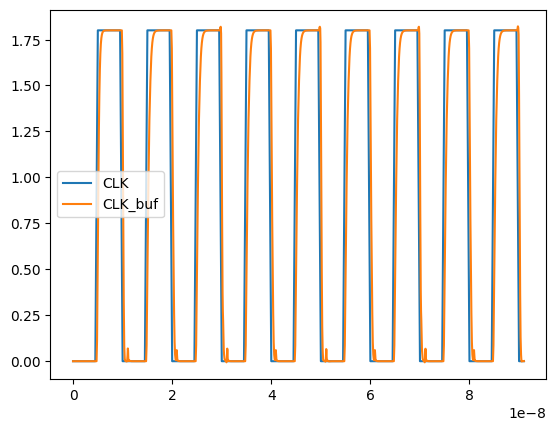

In [ ]:
plt.plot(df['time0'],df['CLK'])
plt.plot(df['time0'],df['clk_buf'])
plt.legend(('CLK', 'CLK_buf'))
plt.show()

###Plot Select control bit

This three bit stands for three MSB bits of the 5-bit select control signal SEL2, SEL3, and SEL4.

The other two bits SEL0 and SEL1 are pinned at 0. So input SEL binary number list is [0, 4, 8, 12, 16, 20, 24, 28].

![SIM_RAM_SEL](https://drive.google.com/uc?id=1LNQm6TD2IdGQAQxCyI4Ze5St_TzA9NJ3)

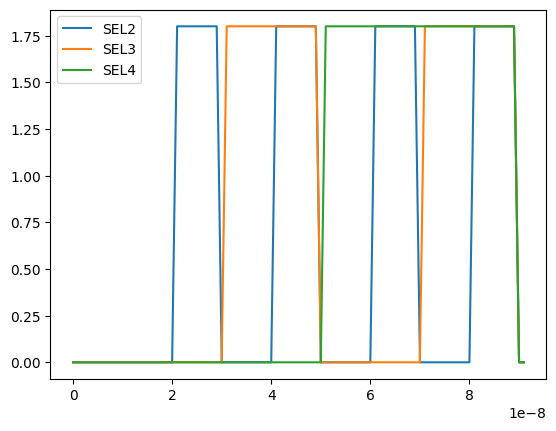

In [ ]:
plt.plot(df['time0'], df['SEL2'])
plt.plot(df['time0'], df['SEL3'])
plt.plot(df['time0'], df['SEL4'])
plt.legend(('SEL2', 'SEL3', 'SEL4'))
plt.show()

###Plot write operation test for Byte[0].

note1: CLK_WORD[0] means output of CLK-gate of WORD[0].

note2: The 'EN' signal(turn on whole RAM32) enabled at '10ns'. So WORD[0] output dosen't change right after CLK on.

####'Do[0]' signal should follow 'Di[0]' signal at the 'rising edge' of CLK_WORD

The result plot should have similar form of this figure below.

![SiM_RAM_Write](https://drive.google.com/uc?id=10b47OwT3opXjtdBP6Cxi4OPoC0AjkVTW)


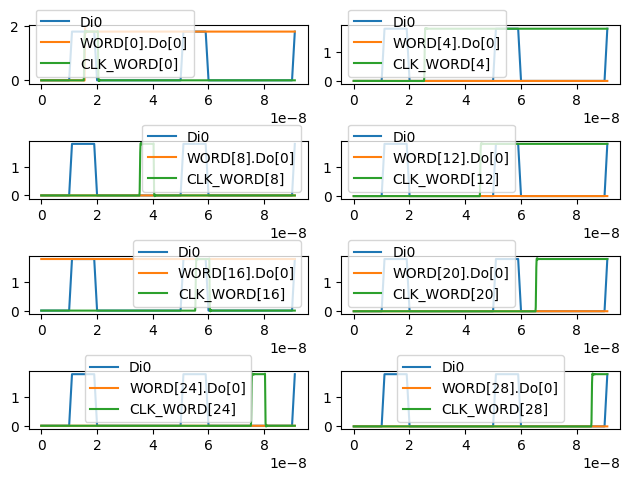

In [ ]:
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.plot(df['time0'],df['di0'])
    plt.plot(df['time0'],df['WORD[%d].byte[0].dffout0'%(i*4)])
    plt.plot(df['time0'],df['WORD[%d].ck_o'%(i*4)])
    plt.legend(('Di0', 'WORD[%d].Do[0]'%(i*4), 'CLK_WORD[%d]'%(i*4)))
plt.tight_layout()
plt.show()

###Plot for Byte[1], Byte[2], Byte[3]

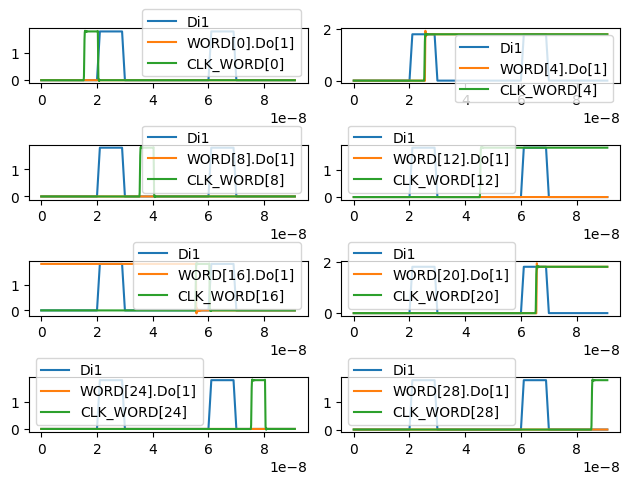

In [ ]:
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.plot(df['time0'],df['di1'])
    plt.plot(df['time0'],df['WORD[%d].byte[1].dffout1'%(i*4)])
    plt.plot(df['time0'],df['WORD[%d].ck_o'%(i*4)])
    plt.legend(('Di1', 'WORD[%d].Do[1]'%(i*4), 'CLK_WORD[%d]'%(i*4)))
plt.tight_layout()
plt.show()

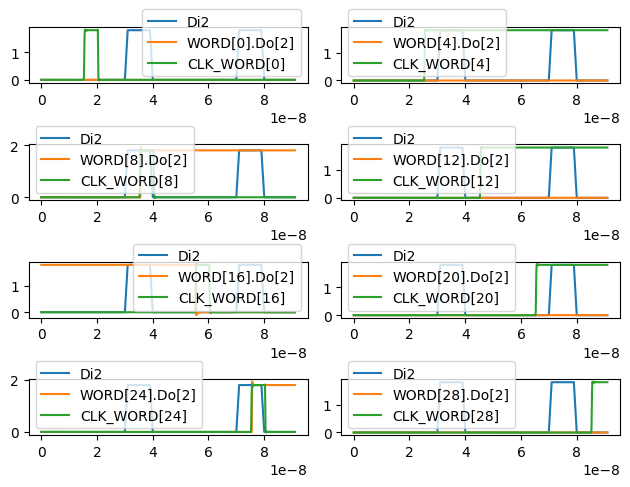

In [ ]:
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.plot(df['time0'],df['di2'])
    plt.plot(df['time0'],df['WORD[%d].byte[2].dffout2'%(i*4)])
    plt.plot(df['time0'],df['WORD[%d].ck_o'%(i*4)])
    plt.legend(('Di2', 'WORD[%d].Do[2]'%(i*4), 'CLK_WORD[%d]'%(i*4)))
plt.tight_layout()
plt.show()

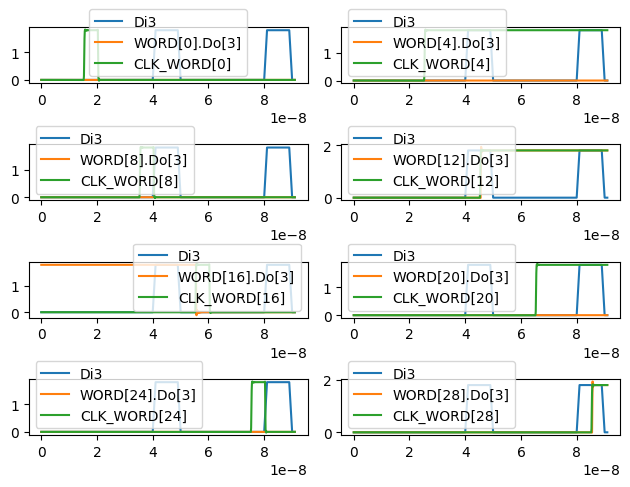

In [ ]:
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.plot(df['time0'],df['di3'])
    plt.plot(df['time0'],df['WORD[%d].byte[3].dffout3'%(i*4)])
    plt.plot(df['time0'],df['WORD[%d].ck_o'%(i*4)])
    plt.legend(('Di3', 'WORD[%d].Do[3]'%(i*4), 'CLK_WORD[%d]'%(i*4)))
plt.tight_layout()
plt.show()

#**Verilog to Laygo**

We also present the layout generation of the RAM8, with subcells made by verilog netlists.\
Subcell layouts of buffers (2x, 12x, 14x, 24x, 36x), 4 input and gate (2x), and 3 input decoder are provided\
by converting instance specified verilog codes to python class instances. Pyverilog is used for the conversion.

In [ ]:
import sys
sys.path.append("/content/laygo2_workspace_sky130/laygo2_example/verilog_to_laygo")
sys.path.append("/content/laygo2_workspace_sky130/laygo2_example/logic_generated")
sys.path.append("/content/laygo2_workspace_sky130/laygo2_example/logic_advance")
print(sys.path)

['/usr/local/lib/python3.9/site-packages', '/content', '/env/python', '/usr/lib/python39.zip', '/usr/lib/python3.9', '/usr/lib/python3.9/lib-dynload', '', '/usr/local/lib/python3.9/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.9/dist-packages/IPython/extensions', '/root/.ipython', '/content/laygo2_workspace_sky130/laygo2', '/content/laygo2_workspace_sky130/laygo2_example/verilog_to_laygo', '/content/laygo2_workspace_sky130/laygo2_example/logic_generated', '/content/laygo2_workspace_sky130/laygo2_example/logic_advance']


### 4 input AND gate (with and4_2x.v)

In [ ]:
# EX) <4 input AND gate> layout generation with verilog netlist

# Parameter definitions #############
# Variables
cell_type = 'and4'
# Templates
tpmos_name = 'pmos_sky'
tnmos_name = 'nmos_sky'
# Grids
pg_name = 'placement_basic'
r12_name = 'routing_12_cmos'
r23_basic_name = 'routing_23_basic'
r23_cmos_name = 'routing_23_cmos'
r34_name = 'routing_34_basic'
# Design hierarchy
libname = 'verilog_to_laygo'
ref_dir_template = './laygo2_example/logic'        # reference logic library
ref_dir_export = f'./laygo2_example/{libname}'
ref_dir_MAG_exported = f'./laygo2_example/{libname}/TCL'
ref_dir_layout = './magic_layout'
# End of parameter definitions ######

# Generation start ##################
# 1. Load templates and grids.
print("Load templates")
templates = tech.load_templates()
tpmos, tnmos = templates[tpmos_name], templates[tnmos_name]
tlib = laygo2.interface.yaml.import_template(filename=f"{ref_dir_template}/logic_generated_templates.yaml")

print("Load grids")
grids = tech.load_grids(templates=templates)
pg, r12, r23_cmos, r23, r34 = grids[pg_name], grids[r12_name], grids[r23_cmos_name], grids[r23_basic_name], grids[r34_name]

nf=2
cellname = f"{cell_type}_{nf}x"
print('--------------------')
print('Now Creating '+cellname)

# 2. Create a design hierarchy
lib = laygo2.object.database.Library(name=libname)
dsn = laygo2.object.database.Design(name=cellname, libname=libname)
lib.append(dsn)

# 3. Create instances.
print("Create instances")
# input verilog file
verilog_filename = f"{cellname}.v"
name, paramlist, decl_info, inst_info = info_from_verilog_code(f"./laygo2_example/{libname}/verilog_codes/{verilog_filename}")

print()
print(name)
print(paramlist)
print(decl_info)
for i in inst_info :
    print(i)

PINS = dict()
for portname in decl_info["Input"]+decl_info["Output"]+decl_info["Input"]:
    PINS[portname] = portname
WIRES = decl_info["Wire"]

instances = []; instances_tlib = []
for instance in inst_info:
    instances_tlib.append(instance["Module"])
    instances.append(tlib[instance["Module"]].generate(name=instance["name"], netmap=instance["portlist"]))

# 4. Place instances.
dsn.place(grid=pg, inst=instances, mn=[0,0])


# 5. Create and place wires.
print("Create wires")
# internal
rc = laygo2.object.template.routing.RoutingMeshTemplate(grid=r23)
# Nodes
rc.add_node(list(dsn.instances.values()))  # Add all instances to the routing mesh as nodes
# Tracks
# ------------- to prevent making tracks with only one node ------------- #
nets_for_count = []
for node in rc.nodes:
    for net in node.pins.values():
        if net.netname not in ['VDD', 'VSS', 'vdd', 'vss']:
            nets_for_count.append(net.netname)
# ----------------------------------------------------------------------- #
# *** define the starting track (parallel to x axis) *** #              #||
_trk = r23.mn(instances[0].pins["OUT"])[0, 1] - 2                       #||
# ****************************************************** #              #||
for n, w in enumerate(WIRES):                                           #||
    if nets_for_count.count(w) != 1: # <<================================||
        rc.add_track(name=f"{w}_net", index=[None, _trk + n], netname=w)
rinst = rc.generate()
dsn.place(grid=pg, inst=rinst)

# VSS
rvss0 = dsn.route(grid=r12, mn=[r12.mn.bottom_left(instances[0]), r12.mn.bottom_right(instances[-1])])
# VDD
rvdd0 = dsn.route(grid=r12, mn=[r12.mn.top_left(instances[0]), r12.mn.top_right(instances[-1])])


# 6. Create pins.
cur_pins = []
for p in PINS.keys(): # PINS.keys() : pin names
    # current order
    for n, i in enumerate(instances):
        cur_netnames = [x.netname for x in i.pins.values()] # netnames in instance i
        if PINS[p] in cur_netnames:   # p : pin names user defines, PINS[p] : netnames corresponding to pin name p
            if p in [pin.netname for pin in cur_pins]: continue     # only save each pins once
            cur_port_key = list(i.pins.keys())[cur_netnames.index(PINS[p])] # cur_netnames is from i.pins.values (converted to string)
            cur_pins.append(dsn.pin(name=p, grid=r23_cmos, mn=r23_cmos.mn.bbox(i.pins[cur_port_key])))
                                      # name as user defined pin name (p)       # need pin name of the instance i (cur_port_key)
                                                                                # that is connected to the netname PINS[p]
pvss0 = dsn.pin(name='VSS', grid=r12, mn=r12.mn.bbox(rvss0))
pvdd0 = dsn.pin(name='VDD', grid=r12, mn=r12.mn.bbox(rvdd0))


# 7. Export to physical database.
print("Export design")

# Uncomment for BAG export
laygo2.interface.magic.export(lib, filename=f"{ref_dir_MAG_exported}/{libname}_{cellname}.tcl", cellname=None, libpath=ref_dir_layout, scale=1, reset_library=False, tech_library='sky130A')

# 8. Export to a template database file.
nat_temp = dsn.export_to_template()
laygo2.interface.yaml.export_template(nat_temp, filename=f"{ref_dir_export}/{libname}_templates.yaml", mode='append')

Load templates
Load grids
--------------------
Now Creating and4_2x
Create instances


Generating LALR tables



and4_2x
()
{'Input': ['A', 'B', 'C', 'D'], 'Output': ['Y'], 'Inout': [], 'Wire': ['Y', 'w1', 'w2'], 'Reg': [], 'Integer': []}
{'Module': 'nand_2x', 'name': 'nand0', 'paramlist': (), 'portlist': {'A': 'C', 'B': 'D', 'OUT': 'w1'}}
{'Module': 'nand_2x', 'name': 'nand1', 'paramlist': (), 'portlist': {'A': 'A', 'B': 'B', 'OUT': 'w2'}}
{'Module': 'nor_2x', 'name': 'nor0', 'paramlist': (), 'portlist': {'A': 'w2', 'B': 'w1', 'OUT': 'Y'}}
Create wires
Export design


{'verilog_to_laygo': {'dummy': {'bbox': [[0, 0], [0, 0]],
   'cellname': 'dummy',
   'libname': 'verilog_to_laygo'},
  'and4_2x': {'libname': 'verilog_to_laygo',
   'cellname': 'and4_2x',
   'bbox': [[0, 0], [1728, 1008]],
   'pins': {'A': {'xy': [[921, 360], [951, 648]],
     'layer': ['M3', 'pin'],
     'name': 'A',
     'netname': 'A'},
    'B': {'xy': [[705, 360], [735, 648]],
     'layer': ['M3', 'pin'],
     'name': 'B',
     'netname': 'B'},
    'C': {'xy': [[345, 360], [375, 648]],
     'layer': ['M3', 'pin'],
     'name': 'C',
     'netname': 'C'},
    'D': {'xy': [[129, 360], [159, 648]],
     'layer': ['M3', 'pin'],
     'name': 'D',
     'netname': 'D'},
    'Y': {'xy': [[1569, 216], [1599, 864]],
     'layer': ['M3', 'pin'],
     'name': 'Y',
     'netname': 'Y'},
    'VSS': {'xy': [[0, -30], [1728, 30]],
     'layer': ['M2', 'pin'],
     'name': 'VSS',
     'netname': 'VSS'},
    'VDD': {'xy': [[0, 978], [1728, 1038]],
     'layer': ['M2', 'pin'],
     'name': 'VDD',
    

###Buffer & 3 input Decoder (with .v files)

In [ ]:
exec(open("laygo2_example/verilog_to_laygo/buffer.py").read())
exec(open("laygo2_example/verilog_to_laygo/dec3x8.py").read())

Load templates
Load grids
--------------------
Now Creating buffer_2x
Create instances


Generating LALR tables
Generating LALR tables



buffer_2x
()
{'Input': ['I'], 'Output': ['O'], 'Inout': [], 'Wire': ['O', 'w1'], 'Reg': [], 'Integer': []}
{'Module': 'inv_2x', 'name': 'inv0', 'paramlist': (), 'portlist': {'I': 'I', 'O': 'w1'}}
{'Module': 'inv_2x', 'name': 'inv1', 'paramlist': (), 'portlist': {'I': 'w1', 'O': 'O'}}
Create wires
Export design
--------------------
Now Creating buffer_12x
Create instances


Generating LALR tables



buffer_12x
()
{'Input': ['I'], 'Output': ['O'], 'Inout': [], 'Wire': ['O', 'w1'], 'Reg': [], 'Integer': []}
{'Module': 'inv_12x', 'name': 'inv0', 'paramlist': (), 'portlist': {'I': 'I', 'O': 'w1'}}
{'Module': 'inv_12x', 'name': 'inv1', 'paramlist': (), 'portlist': {'I': 'w1', 'O': 'O'}}
Create wires
Export design
--------------------
Now Creating buffer_14x
Create instances


Generating LALR tables



buffer_14x
()
{'Input': ['I'], 'Output': ['O'], 'Inout': [], 'Wire': ['O', 'w1'], 'Reg': [], 'Integer': []}
{'Module': 'inv_14x', 'name': 'inv0', 'paramlist': (), 'portlist': {'I': 'I', 'O': 'w1'}}
{'Module': 'inv_14x', 'name': 'inv1', 'paramlist': (), 'portlist': {'I': 'w1', 'O': 'O'}}
Create wires
Export design
--------------------
Now Creating buffer_24x
Create instances


Generating LALR tables



buffer_24x
()
{'Input': ['I'], 'Output': ['O'], 'Inout': [], 'Wire': ['O', 'w1'], 'Reg': [], 'Integer': []}
{'Module': 'inv_24x', 'name': 'inv0', 'paramlist': (), 'portlist': {'I': 'I', 'O': 'w1'}}
{'Module': 'inv_24x', 'name': 'inv1', 'paramlist': (), 'portlist': {'I': 'w1', 'O': 'O'}}
Create wires
Export design
--------------------
Now Creating buffer_36x
Create instances



buffer_36x
()
{'Input': ['I'], 'Output': ['O'], 'Inout': [], 'Wire': ['O', 'w1'], 'Reg': [], 'Integer': []}
{'Module': 'inv_36x', 'name': 'inv0', 'paramlist': (), 'portlist': {'I': 'I', 'O': 'w1'}}
{'Module': 'inv_36x', 'name': 'inv1', 'paramlist': (), 'portlist': {'I': 'w1', 'O': 'O'}}
Create wires
Export design
Load templates
Load grids
--------------------
Now Creating dec3x8_2x
Create instances


Generating LALR tables



dec3x8_2x
()
{'Input': ['A0', 'A1', 'A2', 'EN'], 'Output': ['Y0', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7'], 'Inout': [], 'Wire': ['A0bar', 'A1bar', 'A1bar'], 'Reg': [], 'Integer': []}
{'Module': 'inv_2x', 'name': 'inv0', 'paramlist': (), 'portlist': {'O': 'A0bar', 'I': 'A0'}}
{'Module': 'inv_2x', 'name': 'inv1', 'paramlist': (), 'portlist': {'O': 'A1bar', 'I': 'A1'}}
{'Module': 'inv_2x', 'name': 'inv2', 'paramlist': (), 'portlist': {'O': 'A2bar', 'I': 'A2'}}
{'Module': 'and4_2x', 'name': 'and4_0', 'paramlist': (), 'portlist': {'A': 'A0bar', 'B': 'A1bar', 'C': 'A2bar', 'D': 'EN', 'Y': 'Y0'}}
{'Module': 'and4_2x', 'name': 'and4_1', 'paramlist': (), 'portlist': {'A': 'A0', 'B': 'A1bar', 'C': 'A2bar', 'D': 'EN', 'Y': 'Y1'}}
{'Module': 'and4_2x', 'name': 'and4_2', 'paramlist': (), 'portlist': {'A': 'A0bar', 'B': 'A1', 'C': 'A2bar', 'D': 'EN', 'Y': 'Y2'}}
{'Module': 'and4_2x', 'name': 'and4_3', 'paramlist': (), 'portlist': {'A': 'A0', 'B': 'A1', 'C': 'A2bar', 'D': 'EN', 'Y': 'Y3'}}
{'Modul

### 4 input AND gate (with and4_2x.v)

In [ ]:
# EX) <4 input AND gate> layout generation with verilog netlist

# Parameter definitions #############
# Variables
cell_type = 'and4'
# Templates
tpmos_name = 'pmos_sky'
tnmos_name = 'nmos_sky'
# Grids
pg_name = 'placement_basic'
r12_name = 'routing_12_cmos'
r23_basic_name = 'routing_23_basic'
r23_cmos_name = 'routing_23_cmos'
r34_name = 'routing_34_basic'
# Design hierarchy
libname = 'verilog_to_laygo'
ref_dir_template = './laygo2_example/logic'        # reference logic library
ref_dir_export = f'./laygo2_example/{libname}'
ref_dir_MAG_exported = f'./laygo2_example/{libname}/TCL'
ref_dir_layout = './magic_layout'
# End of parameter definitions ######

# Generation start ##################
# 1. Load templates and grids.
print("Load templates")
templates = tech.load_templates()
tpmos, tnmos = templates[tpmos_name], templates[tnmos_name]
tlib = laygo2.interface.yaml.import_template(filename=f"{ref_dir_template}/logic_generated_templates.yaml")

print("Load grids")
grids = tech.load_grids(templates=templates)
pg, r12, r23_cmos, r23, r34 = grids[pg_name], grids[r12_name], grids[r23_cmos_name], grids[r23_basic_name], grids[r34_name]

nf=2
cellname = f"{cell_type}_{nf}x"
print('--------------------')
print('Now Creating '+cellname)

# 2. Create a design hierarchy
lib = laygo2.object.database.Library(name=libname)
dsn = laygo2.object.database.Design(name=cellname, libname=libname)
lib.append(dsn)

# 3. Create instances.
print("Create instances")
# input verilog file
verilog_filename = f"{cellname}.v"
name, paramlist, decl_info, inst_info = info_from_verilog_code(f"./laygo2_example/{libname}/verilog_codes/{verilog_filename}")

print()
print(name)
print(paramlist)
print(decl_info)
for i in inst_info :
    print(i)

PINS = dict()
for portname in decl_info["Input"]+decl_info["Output"]+decl_info["Input"]:
    PINS[portname] = portname
WIRES = decl_info["Wire"]

instances = []; instances_tlib = []
for instance in inst_info:
    instances_tlib.append(instance["Module"])
    instances.append(tlib[instance["Module"]].generate(name=instance["name"], netmap=instance["portlist"]))

# 4. Place instances.
dsn.place(grid=pg, inst=instances, mn=[0,0])


# 5. Create and place wires.
print("Create wires")
# internal
rc = laygo2.object.template.routing.RoutingMeshTemplate(grid=r23)
# Nodes
rc.add_node(list(dsn.instances.values()))  # Add all instances to the routing mesh as nodes
# Tracks
# ------------- to prevent making tracks with only one node ------------- #
nets_for_count = []
for node in rc.nodes:
    for net in node.pins.values():
        if net.netname not in ['VDD', 'VSS', 'vdd', 'vss']:
            nets_for_count.append(net.netname)
# ----------------------------------------------------------------------- #
# *** define the starting track (parallel to x axis) *** #              #||
_trk = r23.mn(instances[0].pins["OUT"])[0, 1] - 2                       #||
# ****************************************************** #              #||
for n, w in enumerate(WIRES):                                           #||
    if nets_for_count.count(w) != 1: # <<================================||
        rc.add_track(name=f"{w}_net", index=[None, _trk + n], netname=w)
rinst = rc.generate()
dsn.place(grid=pg, inst=rinst)

# VSS
rvss0 = dsn.route(grid=r12, mn=[r12.mn.bottom_left(instances[0]), r12.mn.bottom_right(instances[-1])])
# VDD
rvdd0 = dsn.route(grid=r12, mn=[r12.mn.top_left(instances[0]), r12.mn.top_right(instances[-1])])


# 6. Create pins.
cur_pins = []
for p in PINS.keys(): # PINS.keys() : pin names
    # current order
    for n, i in enumerate(instances):
        cur_netnames = [x.netname for x in i.pins.values()] # netnames in instance i
        if PINS[p] in cur_netnames:   # p : pin names user defines, PINS[p] : netnames corresponding to pin name p
            if p in [pin.netname for pin in cur_pins]: continue     # only save each pins once
            cur_port_key = list(i.pins.keys())[cur_netnames.index(PINS[p])] # cur_netnames is from i.pins.values (converted to string)
            cur_pins.append(dsn.pin(name=p, grid=r23_cmos, mn=r23_cmos.mn.bbox(i.pins[cur_port_key])))
                                      # name as user defined pin name (p)       # need pin name of the instance i (cur_port_key)
                                                                                # that is connected to the netname PINS[p]
pvss0 = dsn.pin(name='VSS', grid=r12, mn=r12.mn.bbox(rvss0))
pvdd0 = dsn.pin(name='VDD', grid=r12, mn=r12.mn.bbox(rvdd0))


# 7. Export to physical database.
print("Export design")

# Uncomment for BAG export
laygo2.interface.magic.export(lib, filename=f"{ref_dir_MAG_exported}/{libname}_{cellname}.tcl", cellname=None, libpath=ref_dir_layout, scale=1, reset_library=False, tech_library='sky130A')

# 8. Export to a template database file.
nat_temp = dsn.export_to_template()
laygo2.interface.yaml.export_template(nat_temp, filename=f"{ref_dir_export}/{libname}_templates.yaml", mode='append')

Load templates
Load grids
--------------------
Now Creating and4_2x
Create instances


Generating LALR tables



and4_2x
()
{'Input': ['A', 'B', 'C', 'D'], 'Output': ['Y'], 'Inout': [], 'Wire': ['Y', 'w1', 'w2'], 'Reg': [], 'Integer': []}
{'Module': 'nand_2x', 'name': 'nand0', 'paramlist': (), 'portlist': {'A': 'C', 'B': 'D', 'OUT': 'w1'}}
{'Module': 'nand_2x', 'name': 'nand1', 'paramlist': (), 'portlist': {'A': 'A', 'B': 'B', 'OUT': 'w2'}}
{'Module': 'nor_2x', 'name': 'nor0', 'paramlist': (), 'portlist': {'A': 'w2', 'B': 'w1', 'OUT': 'Y'}}
Create wires
Export design


{'verilog_to_laygo': {'buffer_12x': {'bbox': [[0, 0], [2016, 1008]],
   'cellname': 'buffer_12x',
   'libname': 'verilog_to_laygo',
   'pins': {'I': {'layer': ['M3', 'pin'],
     'name': 'I',
     'netname': 'I',
     'xy': [[57, 360], [87, 648]]},
    'O': {'layer': ['M3', 'pin'],
     'name': 'O',
     'netname': 'O',
     'xy': [[1857, 216], [1887, 792]]},
    'VDD': {'layer': ['M2', 'pin'],
     'name': 'VDD',
     'netname': 'VDD',
     'xy': [[0, 978], [2016, 1038]]},
    'VSS': {'layer': ['M2', 'pin'],
     'name': 'VSS',
     'netname': 'VSS',
     'xy': [[0, -30], [2016, 30]]}}},
  'buffer_14x': {'bbox': [[0, 0], [2304, 1008]],
   'cellname': 'buffer_14x',
   'libname': 'verilog_to_laygo',
   'pins': {'I': {'layer': ['M3', 'pin'],
     'name': 'I',
     'netname': 'I',
     'xy': [[57, 360], [87, 648]]},
    'O': {'layer': ['M3', 'pin'],
     'name': 'O',
     'netname': 'O',
     'xy': [[2145, 216], [2175, 792]]},
    'VDD': {'layer': ['M2', 'pin'],
     'name': 'VDD',
     '

###Word generation

In [ ]:
# Parameter definitions #############
# Variables
cell_type = 'word_32bit'
nf=2
# Templates
tpmos_name = 'pmos_sky'
tnmos_name = 'nmos_sky'
tptap_name = 'ptap_sky'
tntap_name = 'ntap_sky'
# Grids
pg_name = 'placement_basic'
r12_name = 'routing_12_cmos'
r23_basic_name = 'routing_23_basic'
r23_cmos_name = 'routing_23_cmos'
r34_name = 'routing_34_basic'
# Design hierarchy
libname = 'verilog_to_laygo'
ref_dir_template = './laygo2_example/' #export this layout's information into the yaml in this dir 
ref_dir_export = './laygo2_example/verilog_to_laygo/'
ref_dir_MAG_exported = './laygo2_example/verilog_to_laygo/TCL/'
ref_dir_layout = './magic_layout'
# End of parameter definitions ######

# Generation start ##################
# 1. Load templates and grids.
print("Load templates")
templates = tech.load_templates()
tpmos, tnmos = templates[tpmos_name], templates[tnmos_name]
tlogic_adv = laygo2.interface.yaml.import_template(filename=ref_dir_template+'logic_advance/logic_advanced_templates.yaml')
tv2laygo = laygo2.interface.yaml.import_template(filename=ref_dir_template+'verilog_to_laygo/verilog_to_laygo_templates.yaml')

print("Load grids")
grids = tech.load_grids(templates=templates)
pg, r12, r23_cmos, r23, r34 = grids[pg_name], grids[r12_name], grids[r23_cmos_name], grids[r23_basic_name], grids[r34_name]

cellname = cell_type+'_'+str(nf)+'x'
print('--------------------')
print('Now Creating '+cellname)

# 2. Create a design hierarchy
lib = laygo2.object.database.Library(name=libname)
dsn = laygo2.object.database.Design(name=cellname, libname=libname)
lib.append(dsn)

# 3. Create istances.
print("Create instances")

cells=list()
for i in range(4):
    cells.append(tlogic_adv['byte_dff_'+str(nf)+'x'].generate(name='byte_dff'+str(i)))    # byte_dff from /logic_advance
buf_sel = list()
buf_ck = list()
for i in range(3):
    buf_sel.append(tv2laygo['buffer_'+str(nf)+'x'].generate(name='buf_sel'+str(i)))       # buffer from /verilog_to_laygo
    buf_ck.append(tv2laygo['buffer_'+str(nf)+'x'].generate(name='buf_ck'+str(i)))

# 4. Place instances.
pg_list = [cells[0], buf_sel[0], buf_ck[0], cells[1], buf_sel[1], buf_ck[1], cells[2], buf_sel[2], buf_ck[2], cells[3]]
dsn.place(grid=pg, inst=pg_list, mn=[0,0])
# 5. Create and place wires.
print("Create wires")
## input sig == sel_bar(dec outputs are inverted) -> inv_sel out == sel
# sel_bar
rsel = [0]*3
rclk = [0]*3
for i in range(3):
    mn_list = [r34.mn(cells[i].pins['SEL'])[0],r34.mn(buf_sel[i].pins['I'])[0]]
    _track = [None, r34.mn(cells[i].pins['SEL'])[0,1]]
    rsel[i] = dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
    mn_list = [r34.mn(buf_sel[i].pins['O'])[0], r34.mn(cells[i+1].pins['SEL'])[0]]
    _track = [None, r34.mn(cells[i+1].pins['SEL'])[0,1]]
    dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
# clk
for i in range(3):
    mn_list = [r34.mn(cells[i].pins['CLK'])[0],r34.mn(buf_ck[i].pins['I'])[0]]
    _track = [None, r34.mn(cells[i].pins['CLK'])[0,1]]
    rclk[i] = dsn.route_via_track(grid=r34, mn=mn_list, track=_track)
    mn_list = [r34.mn(buf_ck[i].pins['O'])[0], r34.mn(cells[i+1].pins['CLK'])[0]]
    _track = [None, r34.mn(cells[i+1].pins['CLK'])[0,1]]
    dsn.route_via_track(grid=r34, mn=mn_list, track=_track)

# VSS
rvss0 = dsn.route(grid=r12, mn=[r12.mn.bottom_left(cells[0]), r12.mn.bottom_right(cells[3])])
# VDD
rvdd0 = dsn.route(grid=r12, mn=[r12.mn.top_left(cells[0]), r12.mn.top_right(cells[3])])

# 6. Create pins.
psel = dsn.pin(name='SEL', grid=r34, mn=r34.mn.bbox(rsel[0][-1]))
pwe = list()
for i in range(4):
    pwe.append(dsn.pin(name='WE<'+str(3-i)+'>', grid=r23_cmos, mn=r23_cmos.mn.bbox(cells[i].pins['WE'])))
pclk = dsn.pin(name='CLK', grid=r23_cmos, mn=r23_cmos.mn.bbox(cells[0].pins['CLK']))
pDo = list()
pDi = list()
for i in range(4):
    for j in range(8):
        pDo.append(dsn.pin(name='Do<'+str(8*(3-i)+(7-j))+'>', grid=r23_cmos, mn=r23_cmos.mn.bbox(cells[i].pins['Do<'+str(j)+'>'])))
        pDi.append(dsn.pin(name='Di<'+str(8*(3-i)+(7-j))+'>', grid=r23_cmos, mn=r23_cmos.mn.bbox(cells[i].pins['Di<'+str(j)+'>'])))
pvss0 = dsn.pin(name='VSS', grid=r12, mn=r12.mn.bbox(rvss0))
pvdd0 = dsn.pin(name='VDD', grid=r12, mn=r12.mn.bbox(rvdd0))

# 7. Export to physical database.
print("Export design")

# Uncomment for BAG export
laygo2.interface.magic.export(lib, filename=ref_dir_MAG_exported +libname+'_'+cellname+'.tcl', cellname=None, libpath=ref_dir_layout, scale=1, reset_library=False, tech_library='sky130A')

# 8. Export to a template database file.
nat_temp = dsn.export_to_template()
laygo2.interface.yaml.export_template(nat_temp, filename=ref_dir_export+libname+'_templates.yaml', mode='append')

Load templates
Load grids
--------------------
Now Creating word_32bit_2x
Create instances
Create wires
Export design


{'verilog_to_laygo': {'and4_2x': {'bbox': [[0, 0], [1728, 1008]],
   'cellname': 'and4_2x',
   'libname': 'verilog_to_laygo',
   'pins': {'A': {'layer': ['M3', 'pin'],
     'name': 'A',
     'netname': 'A',
     'xy': [[921, 360], [951, 648]]},
    'B': {'layer': ['M3', 'pin'],
     'name': 'B',
     'netname': 'B',
     'xy': [[705, 360], [735, 648]]},
    'C': {'layer': ['M3', 'pin'],
     'name': 'C',
     'netname': 'C',
     'xy': [[345, 360], [375, 648]]},
    'D': {'layer': ['M3', 'pin'],
     'name': 'D',
     'netname': 'D',
     'xy': [[129, 360], [159, 648]]},
    'VDD': {'layer': ['M2', 'pin'],
     'name': 'VDD',
     'netname': 'VDD',
     'xy': [[0, 978], [1728, 1038]]},
    'VSS': {'layer': ['M2', 'pin'],
     'name': 'VSS',
     'netname': 'VSS',
     'xy': [[0, -30], [1728, 30]]},
    'Y': {'layer': ['M3', 'pin'],
     'name': 'Y',
     'netname': 'Y',
     'xy': [[1569, 216], [1599, 864]]}}},
  'buffer_12x': {'bbox': [[0, 0], [2016, 1008]],
   'cellname': 'buffer_12x

###RAM8 generation

In [ ]:
# Parameter definitions #############
# Variables
cell_type = 'ram8'
nf=2
words_num = 8 # must be an even number
buffer_num = 8+4+1 # number of buffers
# Templates
tpmos_name = 'pmos_sky'
tnmos_name = 'nmos_sky'
tptap_name = 'ptap_sky'
tntap_name = 'ntap_sky'
# Grids
pg_name = 'placement_basic'
r12_name = 'routing_12_cmos'
r23_basic_name = 'routing_23_basic'
r23_cmos_name = 'routing_23_cmos'
r34_name = 'routing_34_basic'
# Design hierarchy
libname = 'verilog_to_laygo'
ref_dir_template = './laygo2_example/' #export this layout's information into the yaml in this dir 
ref_dir_export = f'./laygo2_example/{libname}/'
ref_dir_MAG_exported = f'./laygo2_example/{libname}/TCL/'
ref_dir_layout = './magic_layout'
# End of parameter definitions ######

# Generation start ##################
# 1. Load templates and grids.
print("Load templates")
templates = tech.load_templates()
tpmos, tnmos = templates[tpmos_name], templates[tnmos_name]
# tlogic_prim = laygo2.interface.yaml.import_template(filename=ref_dir_template+'logic/logic_generated_templates.yaml')
# tlogic_adv = laygo2.interface.yaml.import_template(filename=ref_dir_template+'logic_advance/logic_advanced_templates.yaml')
tv2laygo = laygo2.interface.yaml.import_template(filename=ref_dir_template+'verilog_to_laygo/verilog_to_laygo_templates.yaml')

print("Load grids")
grids = tech.load_grids(templates=templates)
pg, r12, r23_cmos, r23, r34 = grids[pg_name], grids[r12_name], grids[r23_cmos_name], grids[r23_basic_name], grids[r34_name]

cellname = cell_type+'_'+str(nf)+'x'
print('--------------------')
print('Now Creating '+cellname)

# 2. Create a design hierarchy
lib = laygo2.object.database.Library(name=libname)
dsn = laygo2.object.database.Design(name=cellname, libname=libname)
lib.append(dsn)

# 3. Create istances.
print("Create instances")
words=list()
for i in range(words_num):
    if i % 2 == 0 :
        words.append(tv2laygo['word_32bit_'+str(nf)+'x'].generate(name='word'+str(i)))
    else :
        words.append(tv2laygo['word_32bit_'+str(nf)+'x'].generate(name='word'+str(i), transform='MX'))
buf_clk = tv2laygo['buffer_'+str(24)+'x'].generate(name='buf_clk')
dec8 = tv2laygo['dec3x8_'+str(nf)+'x'].generate(name='dec8')
buf_we=[]
buf_sel = []
for i in range(4):
    buf_we.append(tv2laygo['buffer_'+str(24)+'x'].generate(name='buf_we'+str(i)))
for i in range(8):
    buf_sel.append(tv2laygo['buffer_'+str(12)+'x'].generate(name='buf_sel'+str(i)))
# NTAP0 = templates[tntap_name].generate(name='MNT0', params={'nf':2, 'tie':'TAP0'})
# PTAP0 = templates[tptap_name].generate(name='MPT0', transform='MX',params={'nf':2, 'tie':'TAP0'})
# NTAP1 = templates[tntap_name].generate(name='MNT1', params={'nf':2, 'tie':'TAP0'})
# PTAP1 = templates[tptap_name].generate(name='MPT1', transform='MX',params={'nf':2, 'tie':'TAP0'})

# 4. Place instances.
mn_ref = [0,0]
for i in range(int(words_num/2)):
    dsn.place(grid=pg, inst=words[i*2], mn=mn_ref)
    dsn.place(grid=pg, inst=words[i*2+1], 
        mn=pg.mn.top_left(words[i*2]) + pg.mn.height_vec(words[i*2+1]))
    mn_ref = pg.mn.top_left(words[i*2+1])

# byte_width = int(pg.mn.width_vec(words[7])[0]/4)
dsn.place(grid=pg, inst=buf_clk, mn=mn_ref)
mn_ref = pg.mn.bottom_right(buf_clk)
dsn.place(grid=pg, inst=dec8, mn=mn_ref)
mn_ref = pg.mn.bottom_right(dec8)
for i in range(8):
    dsn.place(grid=pg, inst=buf_sel[i], mn=mn_ref)
    mn_ref = pg.mn.bottom_right(buf_sel[i])

for i in range(4):
    dsn.place(grid=pg, inst=buf_we[i], mn=mn_ref)
    mn_ref = pg.mn.bottom_right(buf_we[i])

# 5. Create and place wires.
print("Create wires")
# WE
rWE = []; rbuf_we = []; track_y = [3, 2, 4, 0]
for i in range(4):
    # we + buf_we
    _mn = [r34.mn(words[0].pins[f'WE<{i}>'])[0], r34.mn(buf_we[i].pins['O'])[0]]
    _track = [r34.mn(words[0].pins[f'WE<{i}>'])[0][0], r34.mn(buf_we[i].pins['O'])[0][1] + track_y[i]]
    rbuf_we.append(dsn.route_via_track(grid=r34, mn=_mn, track=_track))
    # we in each words
    _mn = [r34.mn(words[0].pins[f'WE<{i}>'])[0], r34.mn(words[words_num-1].pins[f'WE<{i}>'])[1]]
    rWE.append(dsn.route(grid=r34, mn=_mn, via_tag=[False, False]))
# dec output + buf sel + word sel
rDECsel = []; rBUFword = []
for i in range(8):
    # dec output + buf sel
    _mn = [r34.mn(dec8.pins[f'Y{i}'])[0], r34.mn(buf_sel[i].pins['I'])[0]]
    _track = [None, r34.mn(buf_sel[i].pins['I'])[0][1] + 1 + i]
    rDECsel.append(dsn.route_via_track(grid=r34, mn=_mn, track=_track))
    # buf sel[:] -> each word sel
    if i not in (0, 3, 4, 5):  # metal 3 error
        x = 0
    else :
        if i == 0: x = 2
        elif i == 3: x = 1
        elif i == 4: x = -2
        elif i == 5: x = 5
        _mn = [r34.mn(buf_sel[i].pins['O'])[0] + np.array([x, 3]), r34.mn(buf_sel[i].pins['O'])[0] + np.array([0, 3])]
        dsn.route(grid=r34, mn=_mn, via_tag=[True, True])
    _mn = [r34.mn(buf_sel[i].pins['O'])[0] + np.array([x, 3]), r34.mn(words[i].pins['SEL'])[0]]
    _track = [r34.mn(buf_sel[i].pins['O'])[0][0] + x, r34.mn(words[i].pins['SEL'])[0][1]]
    rBUFword.append(dsn.route_via_track(grid=r34, mn=_mn, track=_track))
# buf clk + word clk
rBUFclk = []
for i in range(8):
    _mn = [(r34.mn(buf_clk.pins['O'])[0]+r34.mn(buf_clk.pins['O'])[1])/2, r34.mn(words[i].pins['CLK'])[0]]
    _track = [r34.mn(buf_clk.pins['O'])[0][0], None]
    rBUFclk.append(dsn.route_via_track(grid=r34, mn=_mn, track = _track, via_tag=[True for _ in range(len(_mn))]))
# Di & Do
Di = []; Do = []
for i in range(32):
    _mn = [r34.mn(words[0].pins[f'Di<{i}>'])[0], r34.mn(words[words_num-1].pins[f'Di<{i}>'])[1]]
    Di.append(dsn.route(grid=r34, mn=_mn, via_tag=[False, False]))
    _mn = [r34.mn(words[0].pins[f'Do<{i}>'])[0], r34.mn(words[words_num-1].pins[f'Do<{i}>'])[1]]
    Do.append(dsn.route(grid=r34, mn=_mn, via_tag=[False, False]))
# VSS
rvss0 = dsn.route(grid=r12, mn=[r12.mn.bottom_left(words[0]), r12.mn.bottom_right(words[0])])
# VDD
rvdd0 = dsn.route(grid=r12, mn=[r12.mn.top_left(buf_clk), r12.mn.top_right(words[-1]) + r12.mn.height_vec(dec8)])
# route all vdd / vss
_mn = []
for word in words:
    _mn += [r23.mn.bottom_right(word)]
_mn += [r23.mn.top_right(words[-1])]
_mn += [r23.mn.top_right(words[-1]) + r23.mn.height_vec(dec8)]
rvdd = dsn.route(grid=r23, mn=[_mn[i] - r23.mn.width_vec(words[0]) for i in range(len(_mn))], via_tag=[False for _ in range(len(_mn))])
rvss = dsn.route(grid=r23, mn=_mn, via_tag=[False for _ in range(len(_mn))])
via_vdd = dsn.via(grid=r23, mn=[_mn[i] - r23.mn.width_vec(words[0]) for i in range(1, len(_mn), 2)])
via_vss = dsn.via(grid=r23, mn=[_mn[i] for i in range(0, len(_mn), 2)])


# 6. Create pins.
dA = list()
for i in range(3):
    dA.append(dsn.pin(name=f'A<{i}>', grid=r23_cmos, mn=r23_cmos.mn.bbox(dec8.pins[f'A{i}'])))
pen = dsn.pin(name='EN', grid=r23_cmos, mn=r23_cmos.mn.bbox(dec8.pins['EN']))
pwe = list()
for i in range(4):
    pwe.append(dsn.pin(name=f'WE<{i}>', grid=r23_cmos, mn=r23_cmos.mn.bbox(buf_we[i].pins['I'])))
pclk = dsn.pin(name='CLK', grid=r23_cmos, mn=r23_cmos.mn.bbox(buf_clk.pins['I']))
pDo = list()
pDi = list()
for i in range(32):
    pDo.append(dsn.pin(name=f'Do<{i}>', grid=r34, mn=r23_cmos.mn.bbox(Do[i])))
    pDi.append(dsn.pin(name=f'Di<{i}>', grid=r34, mn=r23_cmos.mn.bbox(Di[i])))
pvss0 = dsn.pin(name='VSS', grid=r12, mn=r12.mn.bbox(rvss0))
pvdd0 = dsn.pin(name='VDD', grid=r12, mn=r12.mn.bbox(rvdd0))

# 7. Export to physical database.
print("Export design")

# Uncomment for BAG export
laygo2.interface.magic.export(lib, filename=ref_dir_MAG_exported +libname+'_'+cellname+'.tcl', cellname=None, libpath=ref_dir_layout, scale=1, reset_library=False, tech_library='sky130A')

# 8. Export to a template database file.
nat_temp = dsn.export_to_template()
laygo2.interface.yaml.export_template(nat_temp, filename=ref_dir_export+libname+'_templates.yaml', mode='append')

Load templates
Load grids
--------------------
Now Creating ram8_2x
Create instances
Create wires
Export design


{'verilog_to_laygo': {'and4_2x': {'bbox': [[0, 0], [1728, 1008]],
   'cellname': 'and4_2x',
   'libname': 'verilog_to_laygo',
   'pins': {'A': {'layer': ['M3', 'pin'],
     'name': 'A',
     'netname': 'A',
     'xy': [[921, 360], [951, 648]]},
    'B': {'layer': ['M3', 'pin'],
     'name': 'B',
     'netname': 'B',
     'xy': [[705, 360], [735, 648]]},
    'C': {'layer': ['M3', 'pin'],
     'name': 'C',
     'netname': 'C',
     'xy': [[345, 360], [375, 648]]},
    'D': {'layer': ['M3', 'pin'],
     'name': 'D',
     'netname': 'D',
     'xy': [[129, 360], [159, 648]]},
    'VDD': {'layer': ['M2', 'pin'],
     'name': 'VDD',
     'netname': 'VDD',
     'xy': [[0, 978], [1728, 1038]]},
    'VSS': {'layer': ['M2', 'pin'],
     'name': 'VSS',
     'netname': 'VSS',
     'xy': [[0, -30], [1728, 30]]},
    'Y': {'layer': ['M3', 'pin'],
     'name': 'Y',
     'netname': 'Y',
     'xy': [[1569, 216], [1599, 864]]}}},
  'buffer_12x': {'bbox': [[0, 0], [2016, 1008]],
   'cellname': 'buffer_12x

### Check TCL files

The following files must have been created.
- laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_and4_2x.tcl
- laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_buffer_12x.tcl
- laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_buffer_14x.tcl
- laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_buffer_24x.tcl
- laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_buffer_2x.tcl
- laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_buffer_36x.tcl
- laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_dec3x8_2x.tcl
- laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_ram8_2x.tcl
- laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_word_32bit_2x.tcl

In [ ]:
!ls laygo2_example/verilog_to_laygo/TCL/*.tcl

laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_and4_2x.tcl
laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_buffer_12x.tcl
laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_buffer_14x.tcl
laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_buffer_24x.tcl
laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_buffer_2x.tcl
laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_buffer_36x.tcl
laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_dec3x8_2x.tcl
laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_ram8_2x.tcl
laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_word_32bit_2x.tcl


### Export the final layout in gds format

Now we can read the TCL files with magic to create the layout and extract GDS and SPICE

In [ ]:
%%script bash -c "PDK_ROOT=/usr/local/share/pdk PDKPATH=/usr/local/share/pdk/sky130A magic -dnull -noconsole -rcfile /usr/local/share/pdk/sky130A/libs.tech/magic/sky130A.magicrc"
addpath /content/laygo2_workspace_sky130/magic_layout/skywater130_microtemplates_dense
addpath /content/laygo2_workspace_sky130/magic_layout/logic_generated
addpath /content/laygo2_workspace_sky130/magic_layout/logic_advanced
addpath /content/laygo2_workspace_sky130/magic_layout/verilog_to_laygo

source laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_buffer_2x.tcl
source laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_buffer_12x.tcl
source laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_buffer_14x.tcl
source laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_buffer_24x.tcl
source laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_buffer_36x.tcl
source laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_and4_2x.tcl
source laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_dec3x8_2x.tcl
source laygo2_example/logic_advance/TCL/logic_advanced_byte_dff_2x.tcl
source laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_word_32bit_2x.tcl
source laygo2_example/verilog_to_laygo/TCL/verilog_to_laygo_ram8_2x.tcl

load verilog_to_laygo_ram8_2x
select top cell
gds labels no
gds write RAM8_v2laygo.gds

flatten RAM8_v2laygo_lvs
load RAM8_v2laygo_lvs
extract
ext2spice lvs
ext2spice
exit


Magic 8.3 revision 388 - Compiled on Sun Mar 26 23:19:03 UTC 2023.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Sourcing design .magicrc for technology sky130A ...
2 Magic internal units = 1 Lambda
Input style sky130(): scaleFactor=2, multiplier=2
The following types are not handled by extraction and will be treated as non-electrical types:
    ubm 
Scaled tech values by 2 / 1 to match internal grid scaling
Loading sky130A Device Generator Menu ...
Using technology "sky130A", version 1.0.404-0-gbb4b48f
Scaled magic input cell logic_generated_inv_2x geometry by factor of 2
Scaled magic input cell via_M2_M3_0 geometry by factor of 2
Scaled magic input cell logic_generated_inv_12x geometry by factor of 2
Scaled magic input cell logic_generated_inv_14x geometry by factor of 2
Scaled magic input cell logic_generated_inv_24x geometry by factor of 2
Scaled magic input cell logic_generated_inv_36x geometry 

Duplicate cell in logic_advanced_cgate_2x:  Instance of cell logic_generated_inv_2x is from path /content/laygo2_workspace_sky130/magic_layout/logic_advanced/magic_layout/logic_generated but cell was previously read from /content/laygo2_workspace_sky130/magic_layout/logic_generated.
New path does not exist and will be ignored.
Duplicate cell in logic_advanced_cgate_2x:  Instance of cell logic_generated_inv_12x is from path /content/laygo2_workspace_sky130/magic_layout/logic_advanced/magic_layout/logic_generated but cell was previously read from /content/laygo2_workspace_sky130/magic_layout/logic_generated.
New path does not exist and will be ignored.
Duplicate cell in logic_advanced_cgate_2x:  Instance of cell logic_generated_nand_2x is from path /content/laygo2_workspace_sky130/magic_layout/logic_advanced/magic_layout/logic_generated but cell was previously read from /content/laygo2_workspace_sky130/magic_layout/logic_generated.
New path does not exist and will be ignored.
Duplicate c

Extract GDS of a RAM8 layout (v2laygo)

In [ ]:
%%script bash -c "PDK_ROOT=/usr/local/share/pdk PDKPATH=/usr/local/share/pdk/sky130A magic -dnull -noconsole -rcfile /usr/local/share/pdk/sky130A/libs.tech/magic/sky130A.magicrc"
addpath /content/laygo2_workspace_sky130/magic_layout/skywater130_microtemplates_dense
addpath /content/laygo2_workspace_sky130/magic_layout/logic_generated
addpath /content/laygo2_workspace_sky130/magic_layout/logic_advanced
addpath /content/laygo2_workspace_sky130/magic_layout/verilog_to_laygo

load verilog_to_laygo_ram8_2x
select top cell
gds labels no
gds write RAM8_v2laygo.gds
exit


Magic 8.3 revision 388 - Compiled on Sun Mar 26 23:19:03 UTC 2023.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Sourcing design .magicrc for technology sky130A ...
2 Magic internal units = 1 Lambda
Input style sky130(): scaleFactor=2, multiplier=2
The following types are not handled by extraction and will be treated as non-electrical types:
    ubm 
Scaled tech values by 2 / 1 to match internal grid scaling
Loading sky130A Device Generator Menu ...
Using technology "sky130A", version 1.0.404-0-gbb4b48f
Scaled magic input cell via_M3_M4_0 geometry by factor of 2
Scaled magic input cell via_M2_M3_0 geometry by factor of 2
Scaled magic input cell verilog_to_laygo_buffer_2x geometry by factor of 2
Scaled magic input cell logic_generated_inv_2x geometry by factor of 2
Scaled magic input cell via_M1_M2_1 geometry by factor of 2
Scaled magic input cell via_M1_M2_0 geometry by factor of 2
Scaled magic input

The cell exists in the search paths at /content/laygo2_workspace_sky130/magic_layout/verilog_to_laygo/verilog_to_laygo_word_32bit_2x.mag.
The discovered version will be used.
The cell exists in the search paths at /content/laygo2_workspace_sky130/magic_layout/verilog_to_laygo/verilog_to_laygo_buffer_2x.mag.
The discovered version will be used.
The cell exists in the search paths at /content/laygo2_workspace_sky130/magic_layout/logic_advanced/logic_advanced_byte_dff_2x.mag.
The discovered version will be used.
Duplicate cell in logic_advanced_cgate_2x:  Instance of cell logic_generated_inv_2x is from path /content/laygo2_workspace_sky130/magic_layout/logic_advanced/magic_layout/logic_generated but cell was previously read from /content/laygo2_workspace_sky130/magic_layout/logic_generated.
New path does not exist and will be ignored.
Duplicate cell in logic_advanced_cgate_2x:  Instance of cell logic_generated_nand_2x is from path /content/laygo2_workspace_sky130/magic_layout/logic_advanc

### Draw the top-level layout

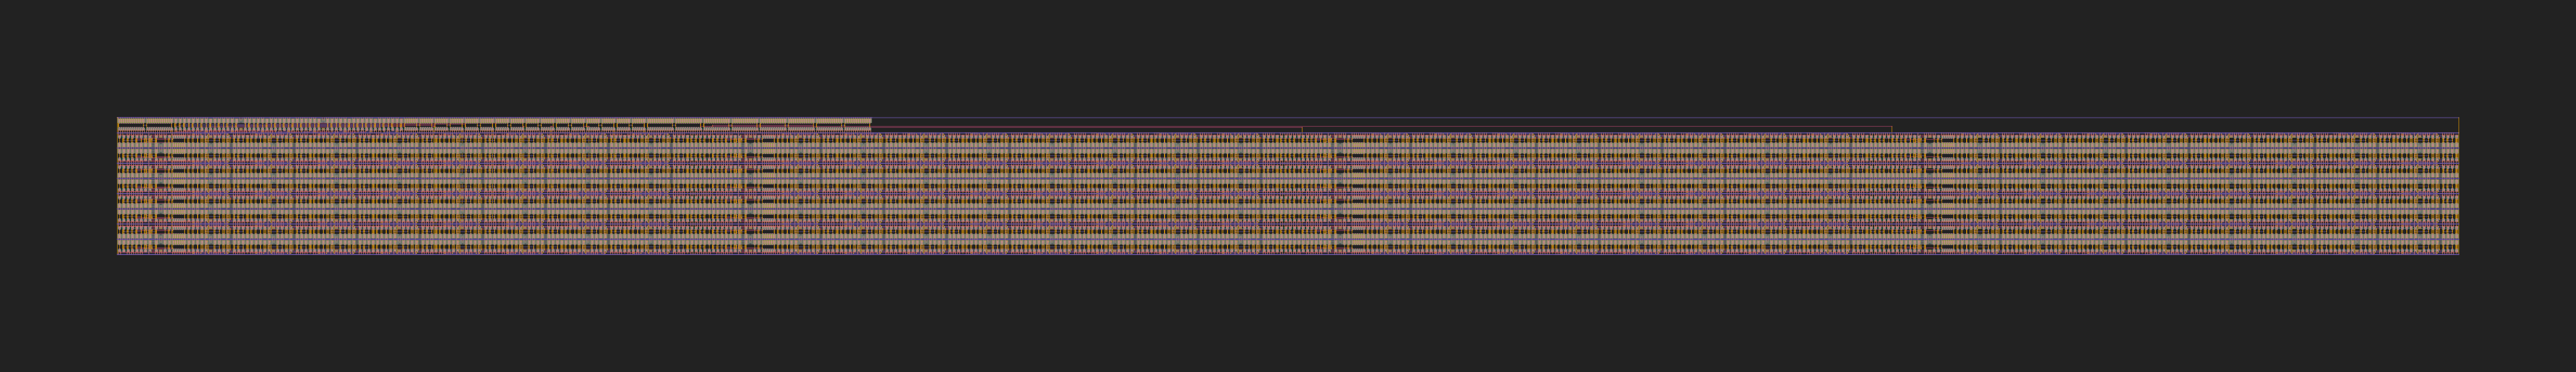

In [ ]:
import gdstk
import cairosvg
from IPython.display import Image

library = gdstk.read_gds('RAM8_v2laygo.gds')
#print(library.cells)
top_cells = library.top_level()
top_cells[0].write_svg('RAM8_v2laygo.svg')
cairosvg.svg2png(url='RAM8_v2laygo.svg', write_to='RAM8_v2laygo.png', scale=0.5)
Image('RAM8_v2laygo.png')

Extract SPICE file of RAM8 (v2laygo)

In [ ]:
%%script bash -c "PDK_ROOT=/usr/local/share/pdk PDKPATH=/usr/local/share/pdk/sky130A magic -dnull -noconsole -rcfile /usr/local/share/pdk/sky130A/libs.tech/magic/sky130A.magicrc"
addpath /content/laygo2_workspace_sky130/magic_layout/skywater130_microtemplates_dense
addpath /content/laygo2_workspace_sky130/magic_layout/logic_generated
addpath /content/laygo2_workspace_sky130/magic_layout/logic_advanced
addpath /content/laygo2_workspace_sky130/magic_layout/verilog_to_laygo

load verilog_to_laygo_ram8_2x
select top cell
flatten RAM8_v2laygo_lvs
load RAM8_v2laygo_lvs
extract
ext2spice lvs
ext2spice
exit


Magic 8.3 revision 388 - Compiled on Sun Mar 26 23:19:03 UTC 2023.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Sourcing design .magicrc for technology sky130A ...
2 Magic internal units = 1 Lambda
Input style sky130(): scaleFactor=2, multiplier=2
The following types are not handled by extraction and will be treated as non-electrical types:
    ubm 
Scaled tech values by 2 / 1 to match internal grid scaling
Loading sky130A Device Generator Menu ...
Using technology "sky130A", version 1.0.404-0-gbb4b48f
Scaled magic input cell via_M3_M4_0 geometry by factor of 2
Scaled magic input cell via_M2_M3_0 geometry by factor of 2
Scaled magic input cell verilog_to_laygo_buffer_2x geometry by factor of 2
Scaled magic input cell logic_generated_inv_2x geometry by factor of 2
Scaled magic input cell via_M1_M2_1 geometry by factor of 2
Scaled magic input cell via_M1_M2_0 geometry by factor of 2
Scaled magic input

The cell exists in the search paths at /content/laygo2_workspace_sky130/magic_layout/verilog_to_laygo/verilog_to_laygo_word_32bit_2x.mag.
The discovered version will be used.
The cell exists in the search paths at /content/laygo2_workspace_sky130/magic_layout/verilog_to_laygo/verilog_to_laygo_buffer_2x.mag.
The discovered version will be used.
The cell exists in the search paths at /content/laygo2_workspace_sky130/magic_layout/logic_advanced/logic_advanced_byte_dff_2x.mag.
The discovered version will be used.
Duplicate cell in logic_advanced_cgate_2x:  Instance of cell logic_generated_inv_2x is from path /content/laygo2_workspace_sky130/magic_layout/logic_advanced/magic_layout/logic_generated but cell was previously read from /content/laygo2_workspace_sky130/magic_layout/logic_generated.
New path does not exist and will be ignored.
Duplicate cell in logic_advanced_cgate_2x:  Instance of cell logic_generated_nand_2x is from path /content/laygo2_workspace_sky130/magic_layout/logic_advanc

### LVS Check

In [ ]:
%%script bash -c "netgen -noconsole" 
lvs {RAM8_v2laygo_lvs.spice RAM8_v2laygo_lvs} {lvs_example/DFFRAM/sylee21/RAM8bit.spice RAM8bit} TCL_scripts/setup.tcl lvs_RAM8_v2laygo.out
exit

Netgen 1.5.251 compiled on Sun 02 Apr 2023 11:21:24 AM UTC
Reading netlist file RAM8_v2laygo_lvs.spice
Call to undefined subcircuit sky130_fd_pr__pfet_01v8
Creating placeholder cell definition.
Call to undefined subcircuit sky130_fd_pr__nfet_01v8_lvt
Creating placeholder cell definition.
Reading netlist file lvs_example/DFFRAM/sylee21/RAM8bit.spice
Call to undefined subcircuit word
Creating placeholder cell definition.
Call to undefined subcircuit dec_3to8
Creating placeholder cell definition.
Call to undefined subcircuit inv
Creating placeholder cell definition.
Call to undefined subcircuit byte_dff
Creating placeholder cell definition.
Call to undefined subcircuit and_4in
Creating placeholder cell definition.
Call to undefined subcircuit sky130_fd_pr__nfet_01v8_lvt
Creating placeholder cell definition.
Call to undefined subcircuit sky130_fd_pr__pfet_01v8
Creating placeholder cell definition.
Call to undefined subcircuit nand
Creating placeholder cell definition.
Call to undefined sub

### Print LVS Result

If "Netlists match uniquely" or "Netlists match uniquely with port errors" appears in the output, we pass the check.

"Pin match fail" error message may appears, you can ignore it since this LVS test have passed in Linux machine.

If checking the message is hard due to too long log, you can download 'lvs_RAM8_v2laygo.out' in /content/laygo2_workspace_sky130/ dir.

In [ ]:
f = open("lvs_RAM8_v2laygo.out", "r") 
while True:
    line = f.readline()
    if not line: break
    print(line)
f.close()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  4 = 7506                                 |  4 = 7506                                 

                                           |                                           

Instance: sky130_fd_pr__pfet_01v8:9782     |Instance: word:ord6/byte_dff:Byte_4/tinv:_ 

  (1,3) = (16,2)                           |  (1,3) = (4,2)                            

  2 = 10                                   |  2 = 10                                   

  4 = 7506                                 |  4 = 7506                                 

                                           |                                           

Instance: sky130_fd_pr__pfet_01v8:9707     |Instance: word:ord6/byte_dff:Byte_3/tinv:_ 

  (1,3) = (16,2)                           |  (1,3) = (4,2)                            

  2 = 10                                   |  2 = 10                                   

  4 = 7506                                 |  4 = 7506                    